# Case Study 8 - Cherry Blossom Race: Modeling Age and Run-Time Distribution Over the Years

Yao Yao, Brian Kruse, Ivelin Angelov

MSDS 7333 Section 402

July 2, 2018

## Introduction
Race results from Washington D.C.'s Cherry Blossom Ten-Mile Run from 1999 to 2012 are used to study how people's run-time finishes changes with age [1]. The race is held in April, when cherry trees blossom, and there are monetary incentives for having the quickest run-time for the thousands of people who participate every year. With increasing demand to participate in the race, there is an opt-in lottery system which limits the number of runners but also balances the number of female to male runners per race [1].

Annual race data for male and female results are scraped via the Cherry Blossom Race website for data cleaning and analysis. We are answering question 10 from the "Data Science in R" textbook (Page 101) [2]: *"We have seen that the 1999 runners were typically older than the 2012 runners. Compare the age distribution of the runners across all 14 years of the races. Use quantile-quantile plots, boxplots, and density curves to make your comparisons. How do the distributions change over the years? Was it a gradual change?"* Statistical analysis, summary statistics, and plots are used accordingly when comparing age distribution for all runners across the 14 years as well as examining the run-time to age relationship. For both gender of runners that participated, there is a right-skewed distribution in age with the highest frequency of runners falling into the 25-35 year age bin. Findings conclude that the trend in participating age steadily decreases in both mean and median values from 1999 to 2012.

## Methods
The steps used for this analysis were: 1) data scraping from different HTML formats; 2) text to column separation, data clean up, and outlier removal; 3) boxplots analysis; 4) density curves analysis; 5) and quantile-quantile plots analysis. The workflow includes modified versions of R code distributed in class and references the corresponding textbook chapter for this case study [3][2].

In [1]:
library(XML)
library(ggplot2)
suppressPackageStartupMessages(require('plyr'))
library(grid)
library(gridExtra)
suppressPackageStartupMessages(require('formattable'))
library(RColorBrewer)
options(warn=-1)

## Results

### Data Scraping and Cleaning

Runners' data is formatted differently every year and go through an exhaustive text to column separation and data clean up after scraping. DataScrapeAndClean.R is a separate external notebook loaded for the cleaning process, where the cleaned version of the dataset is then reloaded into the notebook, which allows us to focus on our analysis for participating age distributions over time. 

In [2]:
# Could be commented out once the .rda files are generated after the first run through. Please use a new directory
source('DataScrapeAndClean.R', echo = FALSE)

In [3]:
# Checkpoint loaded
load("cbMen.rda")
load("cbWomen.rda")

### Data Outlier Removal

To get a sense of the data, the fastest recorded time for Cherry Blossom 10 mile race is 43 minutes and 20 seconds, where the course was truncated to 9.37 miles in 2015 due to a traffic accident [4]. Therefore, any recorded time under 40 minutes are eliminated from the dataset [Table 1]. There are no missing values for run-time for all the participants finish under reasonable time.

#### Table 1: Any Recorded Time Under 40 Minutes Are Eliminated From the Dataset

In [4]:
formattable(cbMen[cbMen$runTime < 40, ])
formattable(cbWomen[cbWomen$runTime < 40, ])

,year,sex,name,home,age,runTime
2001.2250,2001,M,Peter HUI,Silver Spring MD,70,1.5


year,sex,name,home,age,runTime


Observations with missing age values are also eliminated because they are unable to be visualized for age distributions [Table 2].
#### Table 2: Observations With Missing Age Values Are Eliminated

In [5]:
formattable(cbMen[is.na(cbMen$age), ])
formattable(cbWomen[is.na(cbWomen$age), ])

,year,sex,name,home,age,runTime
1999.1083,1999,M,Rob Faye,Vienna VA,NA,78.25000
2002.1227,2002,M,William STEIGEL,Washington DC,NA,77.70000
2002.2491,2002,M,Dave BOYER,Washington DC,NA,91.31667
2005.267,2005,M,John Marquart,Madison WI,NA,66.01667
2005.542,2005,M,Runner Dx Iii X Viii,Rockville MD,NA,69.76667
2005.925,2005,M,Runner Cb Vii Ix V,Rockville MD,NA,77.55000
2005.1158,2005,M,Runner Xx,Rockville MD,NA,78.80000
2005.1791,2005,M,Joseph Ferguson,Richmond VA,NA,86.68333
2005.2129,2005,M,Runner Bc Iii Ii O,Rockville MD,NA,87.00000
2005.3464,2005,M,Ronald Henry,Arlington VA,NA,97.16667


,year,sex,name,home,age,runTime
1999.3,1999,W,Lidiya Grigoryeva,Russia,NA,53.66667
1999.8,1999,W,Gladys Asiba,Kenya,NA,54.83333
1999.17,1999,W,Connie Buckwalter,Lancaster PA,NA,59.60000
1999.2175,1999,W,Ann Reid,Bethesda MD,NA,113.05000
2002.270,2002,W,Unknown RUNNER,Washington DC,NA,78.98333
2002.1281,2002,W,Melissa AKEY,Washington DC,NA,94.20000
2002.2184,2002,W,Yvonne BONNER,Alexandria VA,NA,102.13333
2002.3261,2002,W,Unnamed Athlete,Unknown,NA,124.91667
2005.151,2005,W,Ashley Griffin,Washington DC,NA,75.06667
2005.159,2005,W,Lindsay Vogtsberger,Arlington VA,NA,68.81667


The youngest person to run a half marathon (13 miles) is 6 years old [5]. For a large metropolitan area, having young participants is possible but any person younger than 6 years old is eliminated from the dataset [Table 3]. The oldest person in the dataset is 89 years old and falls within the reasonable age for a 10 mile run as 90 year olds have been in marathons for 26 miles [6].

#### Table 3: Any Person Younger Than 6 Years Old is Eliminated From the Dataset

In [6]:
formattable(cbMen[cbMen$age < 6 & !is.na(cbMen$age), ])
formattable(cbWomen[cbWomen$age < 6 & !is.na(cbWomen$age), ])

,year,sex,name,home,age,runTime
2001.1377,2001,M,Steve PINKOS,Washington DC,0,80.11667
2001.3003,2001,M,Jeff LAKE,Clarksville MD,0,99.43333
2001.3052,2001,M,Greg RHODE,Washington DC,0,97.23333
2002.2163,2002,M,Arlon WILBER,Durham NC,4,88.93333
2002.3282,2002,M,Nicholas RUGH,Arlington VA,1,103.75000
2003.1337,2003,M,John Riedel,Annapolis MD,2,79.35000
2003.2376,2003,M,Robert Anderson,Washington DC,0,88.80000


,year,sex,name,home,age,runTime
2001.2611,2001,W,Loretta CUCE,Alexandria VA,0,113.6333


29 observations are removed from 70070 male participants and 22 observations are removed from 70041 female participants prior to further analysis.

In [7]:
cbMenSub = cbMen[cbMen$runTime > 40 & !is.na(cbMen$age) & cbMen$age >= 6, ]
cbWomenSub = cbWomen[cbWomen$runTime > 40 & !is.na(cbWomen$age) & cbWomen$age >= 6, ]
nrow(cbMen)
nrow(cbWomen)
nrow(cbMen) - nrow(cbMenSub)
nrow(cbWomen) - nrow(cbWomenSub)

[1] 70070

[1] 75972

[1] 29

[1] 22

### Boxplots

After cleaning for outliers, the interactive boxplot of male runners' age over years shows that the average age is 40 from 1999 to 2003, is 39 from 2004 to 2005, is 38 from 2006 to 2007, is 37 from 2008 to 2009 and from 2011 to 2012, and is 36 in 2010 [Figure 1A]. The interactive boxplot of female runners' age over years shows that the average age is 35 in 2000, 2002, and 2003; 34 in 1999, 2001, and 2005; and is 33 in 2004 and from 2006 to 2012 [Figure 1B]. Male ages steadily decrease from an average from 40.33 to 37.75 years old while female ages has a dampened decrease from 34.90 to 33.88 years old over the same time period. The median age is more obvious as male ages declines from 40 to 35 while female ages declines from 33 to 32 due to the right skewedness for both datasets [Figure 1]. 

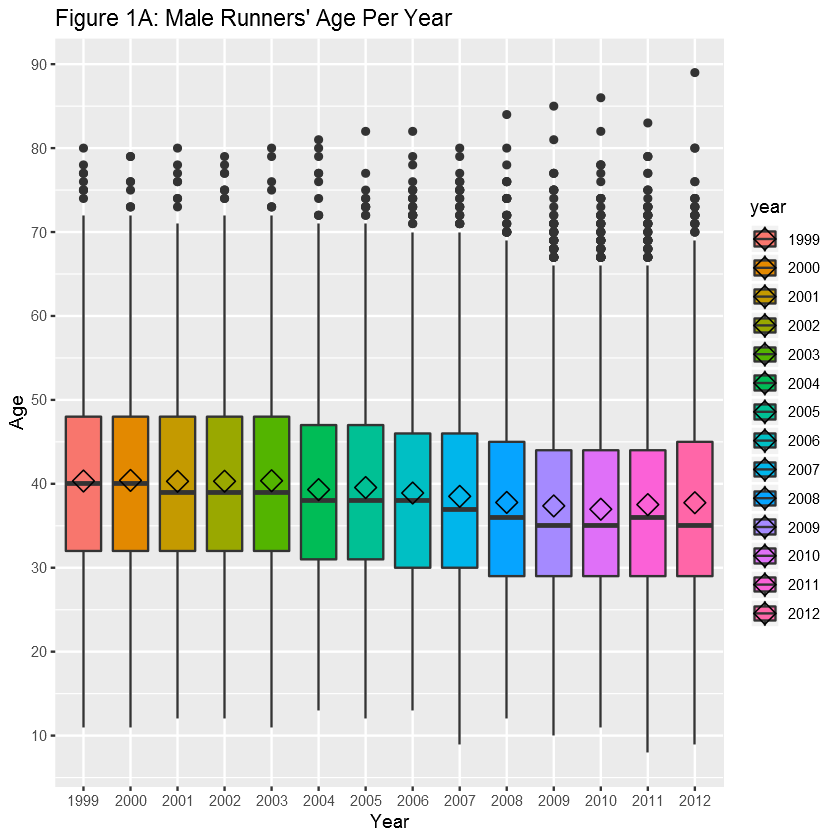

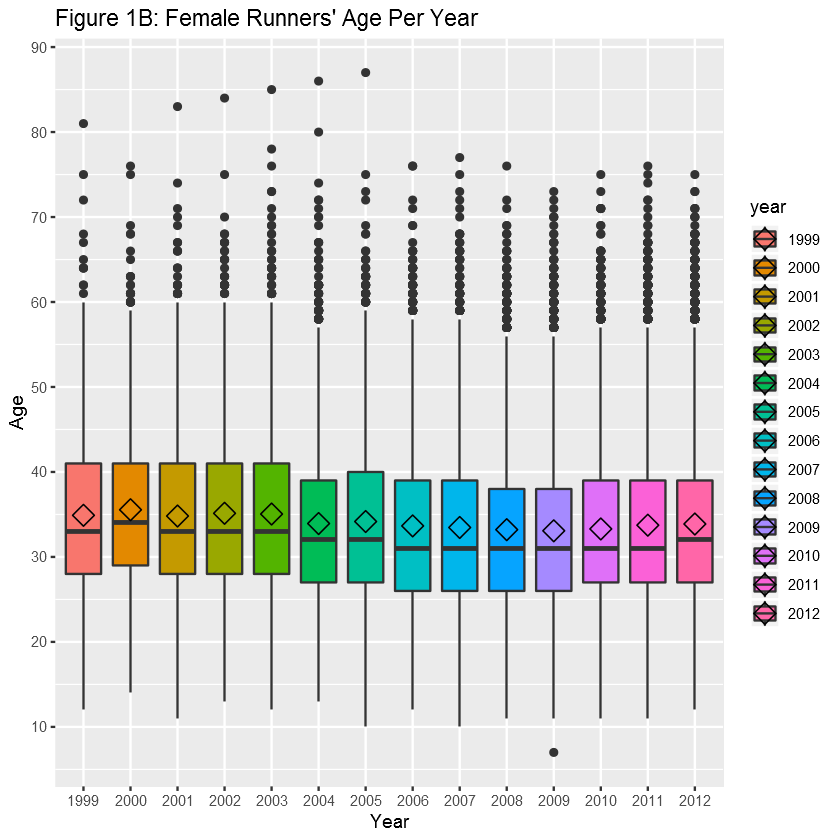

In [8]:
# boxplot(cbMenSub$age ~ cbMenSub$year, ylab = "Age", xlab = "Year")
# title(main = "Male Runners' Age Per Year")

cbMensPlot <- cbMenSub
cbMensPlot$year <- as.character(cbMensPlot$year)

ggplot(cbMensPlot, aes(x=year, y=age, fill=year)) + geom_boxplot() + 
    scale_y_continuous(breaks = pretty(cbMensPlot$age, n = 10)) + ggtitle("Figure 1A: Male Runners' Age Per Year") + xlab('Year') + ylab('Age') +
    stat_summary(fun.y=mean, geom="point", shape=5, size=4)

# boxplot(cbWomenSub$age ~ cbWomenSub$year, ylab = "Age", xlab = "Year")
# title(main = "Female Runners' Age Per Year")

cbWomensPlot <- cbWomenSub
cbWomensPlot$year <- as.character(cbWomensPlot$year)

ggplot(cbWomensPlot, aes(x=year, y=age, fill=year)) + geom_boxplot() + 
    scale_y_continuous(breaks = pretty(cbWomensPlot$age, n = 10)) + ggtitle("Figure 1B: Female Runners' Age Per Year") + xlab('Year') + ylab('Age') +
    stat_summary(fun.y=mean, geom="point", shape=5, size=4)

With boxplots, the male and female run-time results per year looks as if fluctuates randomly and may need further statistical analysis and different variable comparisons to address [Figure 2].

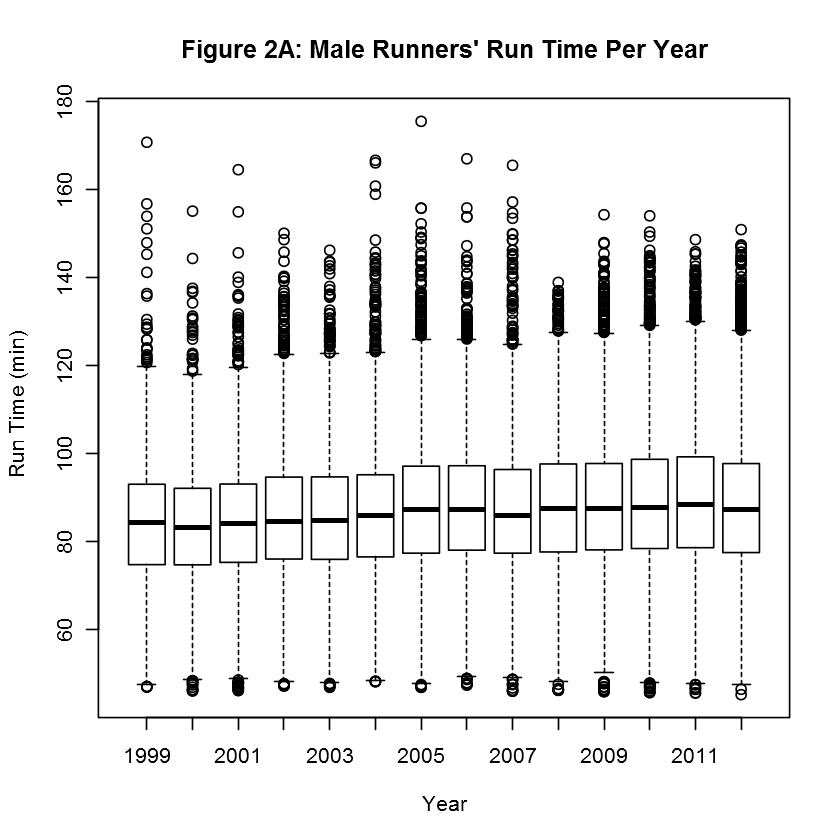

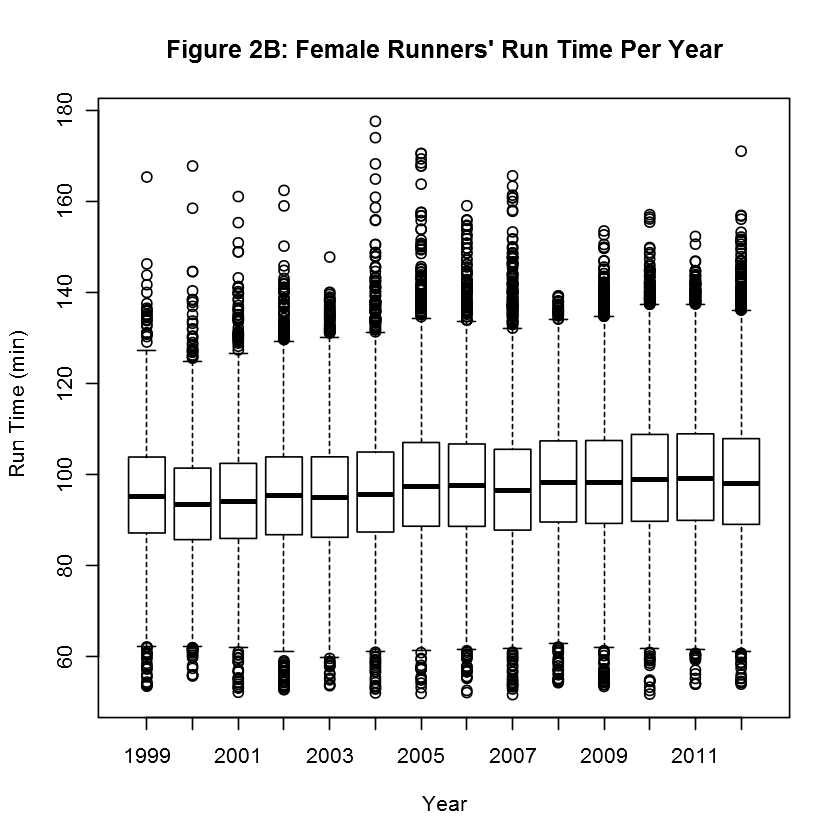

In [9]:
boxplot(cbMenSub$runTime ~ cbMenSub$year, xlab = "Year", ylab = "Run Time (min)")
title(main = "Figure 2A: Male Runners' Run Time Per Year")
boxplot(cbWomenSub$runTime ~ cbWomenSub$year, xlab = "Year", ylab = "Run Time (min)")
title(main = "Figure 2B: Female Runners' Run Time Per Year")

Plotting the scatterplot of male and female runners' run-time per age shows a slight increase in run-time as age increases and may lead to further insight into the dataset [Figure 3].

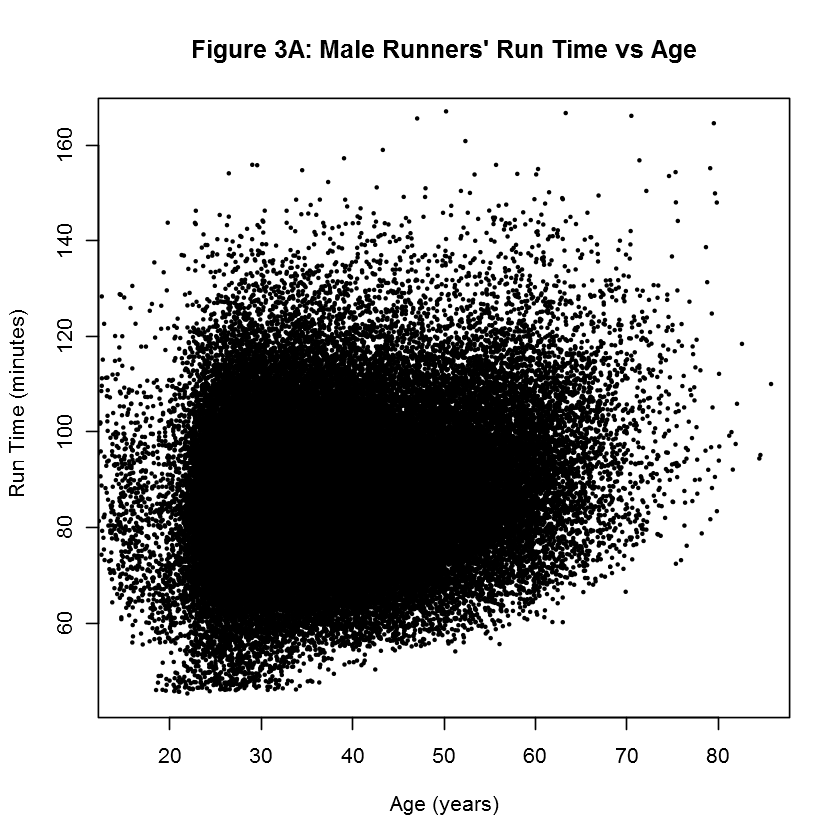

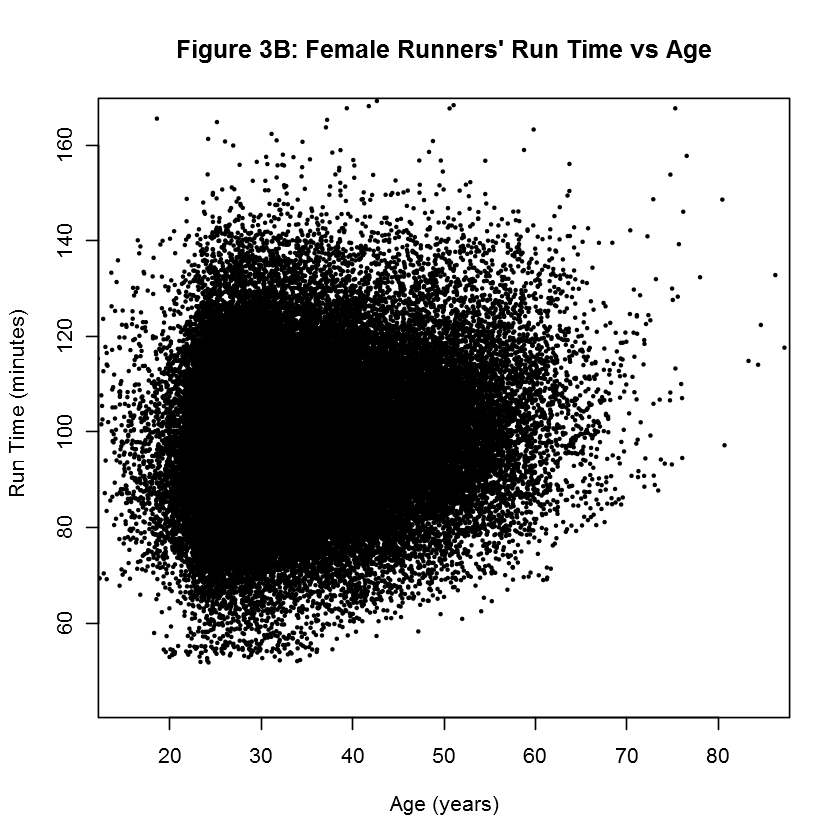

In [10]:
plot(runTime ~ jitter(age, amount = 0.5), 
     data = cbMenSub, 
     pch = 19,cex = 0.2,
     ylim = c(45, 165), xlim = c(15, 85),
     xlab = "Age (years)", ylab = "Run Time (minutes)")
title(main = "Figure 3A: Male Runners' Run Time vs Age")

plot(runTime ~ jitter(age, amount = 0.5), 
     data = cbWomenSub, 
     pch = 19,cex = 0.2,
     ylim = c(45, 165), xlim = c(15, 85),
     xlab = "Age (years)", ylab = "Run Time (minutes)")
title(main = "Figure 3B: Female Runners' Run Time vs Age")

The mean age is 38.6 and the median age is 37 for men and the mean age is 33.8 and the median age is 32 for women, where we see a right skewedness of participants for both male and female runners [Figure 4]. Categorical bins are created from age 5 to 90 for the dataset, where the fastest run-time by age category is 15 to 25 while age 25 to 35 has most participants for both genders [Figure 5]. Further residual exploration of age shows that age selection has a relatively randomized distribution from the lottery system for runner participation in the race [Figure 6].

In [11]:
mean(cbMenSub$age)
median(cbMenSub$age)
mean(cbWomenSub$age)
median(cbWomenSub$age)

[1] 38.61003

[1] 37

[1] 33.84922

[1] 32

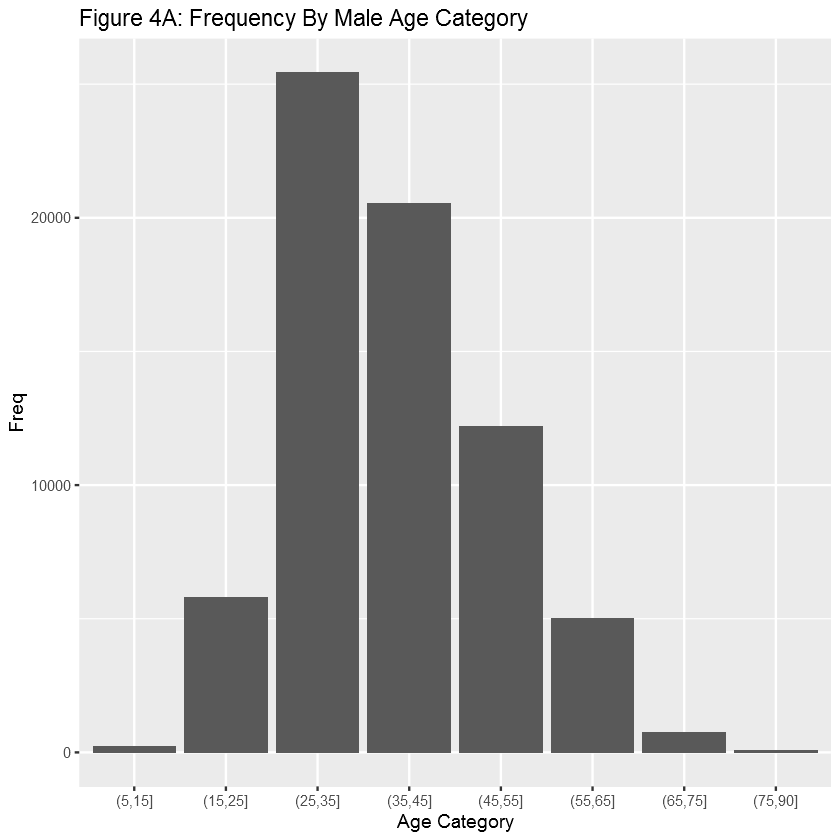

(Intercept)         age 
 78.9769692   0.2202031


Call:
lm(formula = runTime ~ age, data = cbMenSub)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.381 -10.234  -0.956   9.105  82.530 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 78.976969   0.205674  383.99   <2e-16 ***
age          0.220203   0.005127   42.95   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.78 on 70039 degrees of freedom
Multiple R-squared:  0.02566,	Adjusted R-squared:  0.02565 
F-statistic:  1845 on 1 and 70039 DF,  p-value: < 2.2e-16


[1] "lm"

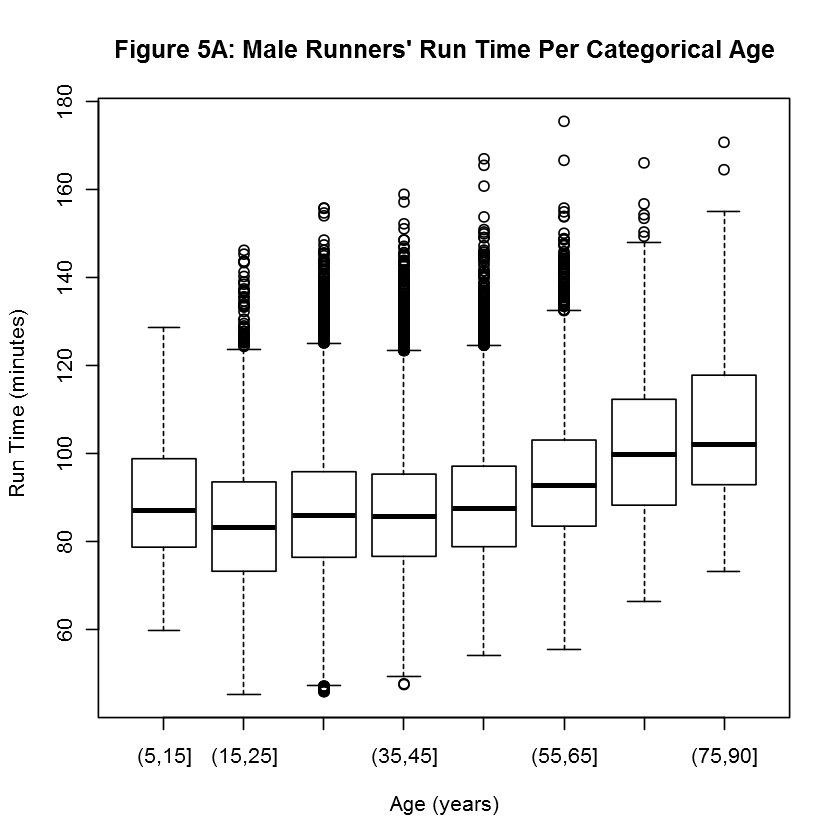

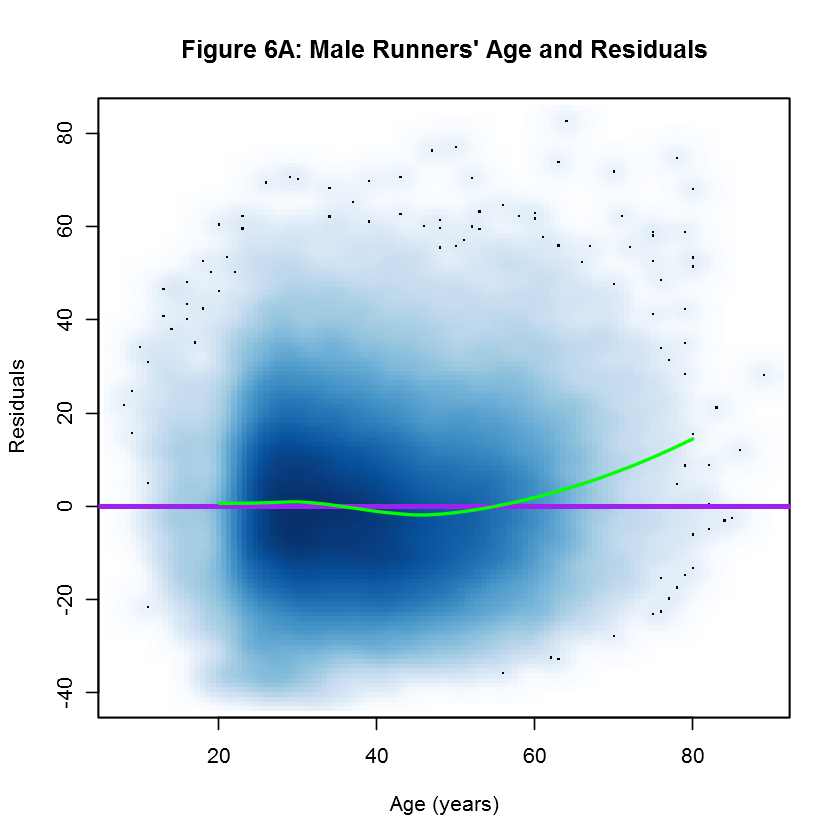

In [12]:
# smoothScatter(y = cbMen$runTime, x = cbMen$age,
#               ylim = c(40, 165), xlim = c(15, 85),
#               xlab = "Age (years)", ylab = "Run Time (minutes)")
# title(main = "Male Runners' Run Time vs Age")

MageCat = cut(cbMenSub$age, breaks = c(seq(5, 75, 10), 90))
bins=as.data.frame(table(MageCat))

ggplot(bins, aes(x=MageCat, y=Freq)) + geom_bar(stat="identity") + ggtitle("Figure 4A: Frequency By Male Age Category") + xlab('Age Category')


plot(cbMenSub$runTime ~ MageCat, xlab = "Age (years)", ylab = "Run Time (minutes)")
title(main = "Figure 5A: Male Runners' Run Time Per Categorical Age")

lmMAge = lm(runTime ~ age, data = cbMenSub)
lmMAge$coefficients

summary(lmMAge)
class(lmMAge)

smoothScatter(x = cbMenSub$age, y = lmMAge$residuals, xlab = "Age (years)", ylab = "Residuals")
abline(h = 0, col = "purple", lwd = 3)
title(main = "Figure 6A: Male Runners' Age and Residuals")

resid.lo = loess(resids ~ age, 
                 data = data.frame(resids = residuals(lmMAge),
                                   age = cbMenSub$age))

age20to80 = 20:80
resid.lo.pr = predict(resid.lo, newdata = data.frame(age = age20to80))
lines(x = age20to80, y = resid.lo.pr, col = "green", lwd = 2)

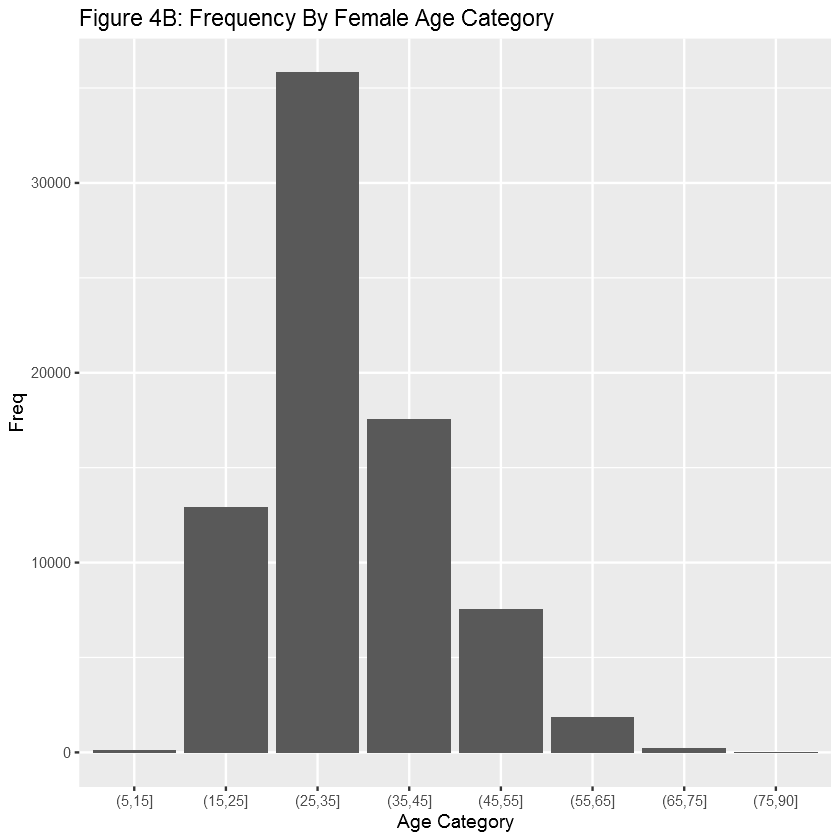

(Intercept)         age 
 91.4241212   0.1969165


Call:
lm(formula = runTime ~ age, data = cbWomenSub)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.103  -9.450  -0.649   8.638  79.200 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 91.424121   0.194796  469.33   <2e-16 ***
age          0.196916   0.005552   35.47   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.11 on 75948 degrees of freedom
Multiple R-squared:  0.01629,	Adjusted R-squared:  0.01628 
F-statistic:  1258 on 1 and 75948 DF,  p-value: < 2.2e-16


[1] "lm"

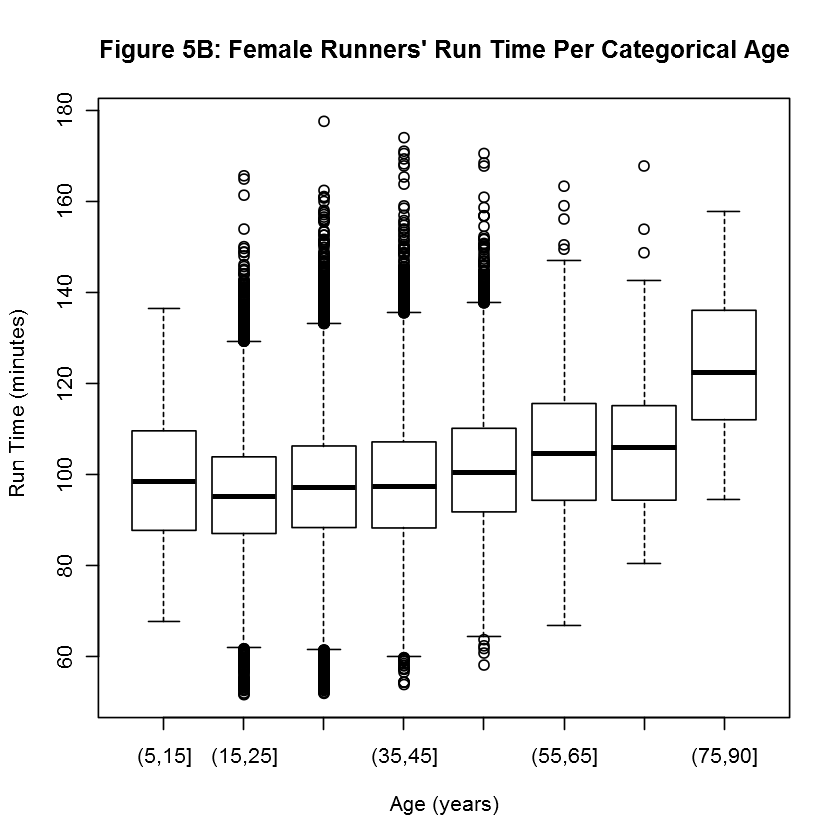

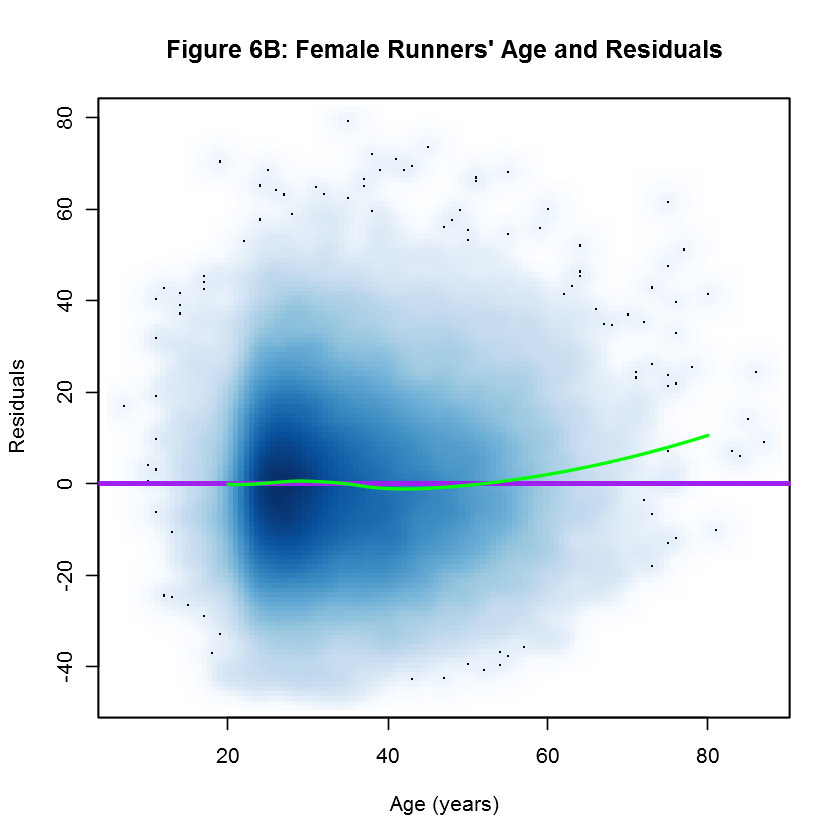

In [13]:
# smoothScatter(y = cbWomen$runTime, x = cbWomen$age,
#               ylim = c(40, 165), xlim = c(15, 85),
#               xlab = "Age (years)", ylab = "Run Time (minutes)")
# title(main = "Female Runners' Run Time vs Age")

WageCat = cut(cbWomenSub$age, breaks = c(seq(5, 75, 10), 90))
bins=as.data.frame(table(WageCat))

ggplot(bins, aes(x=WageCat, y=Freq)) + geom_bar(stat="identity") + ggtitle("Figure 4B: Frequency By Female Age Category") + xlab('Age Category')

plot(cbWomenSub$runTime ~ WageCat, xlab = "Age (years)", ylab = "Run Time (minutes)")
title(main = "Figure 5B: Female Runners' Run Time Per Categorical Age")

lmWAge = lm(runTime ~ age, data = cbWomenSub)
lmWAge$coefficients

summary(lmWAge)
class(lmWAge)

smoothScatter(x = cbWomenSub$age, y = lmWAge$residuals, xlab = "Age (years)", ylab = "Residuals")
abline(h = 0, col = "purple", lwd = 3)
title(main = "Figure 6B: Female Runners' Age and Residuals")

resid.lo = loess(resids ~ age, 
                 data = data.frame(resids = residuals(lmWAge),
                                   age = cbWomenSub$age))

age20to80 = 20:80
resid.lo.pr = predict(resid.lo, newdata = data.frame(age = age20to80))
lines(x = age20to80, y = resid.lo.pr, col = "green", lwd = 2)

When fitting for participant run-time results based on categorical age, only 20 to 80 year olds are considered because of data sufficiency. Piecewise linear and Loess curve both show 3 change points for 4 slope trends for run-time prediction per age category for both male and female runners [Figure 7]. The inflection points for both male and female runners conclude that run-time results are the fastest for age 20, increase by age 30, decrease slightly by age 40, increase slightly by age 50, and increase steeply by age 60 and above.


Call:
lm(formula = runTime ~ age + over50, data = cbMenSub)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.295 -10.105  -0.893   9.058  79.109 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 82.987220   0.261115  317.82   <2e-16 ***
age          0.099746   0.007052   14.14   <2e-16 ***
over50       0.575779   0.023260   24.75   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.71 on 70038 degrees of freedom
Multiple R-squared:  0.03411,	Adjusted R-squared:  0.03409 
F-statistic:  1237 on 2 and 70038 DF,  p-value: < 2.2e-16



Call:
lm(formula = runTime ~ ., data = cbind(cbMenSub[, c("runTime", 
    "age")], overAge))

Residuals:
    Min      1Q  Median      3Q     Max 
-40.707 -10.124  -0.884   9.039  78.991 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 77.630465   0.826897  93.882  < 2e-16 ***
age          0.302688   0.030107  10.054  < 2e-16 ***
over30      -0.323367   0.044403  -7.283 3.31e-13 ***
over40       0.179514   0.040404   4.443 8.88e-06 ***
over50       0.508083   0.052938   9.598  < 2e-16 ***
over60      -0.008498   0.077695  -0.109    0.913    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.71 on 70035 degrees of freedom
Multiple R-squared:  0.03485,	Adjusted R-squared:  0.03478 
F-statistic: 505.7 on 5 and 70035 DF,  p-value: < 2.2e-16


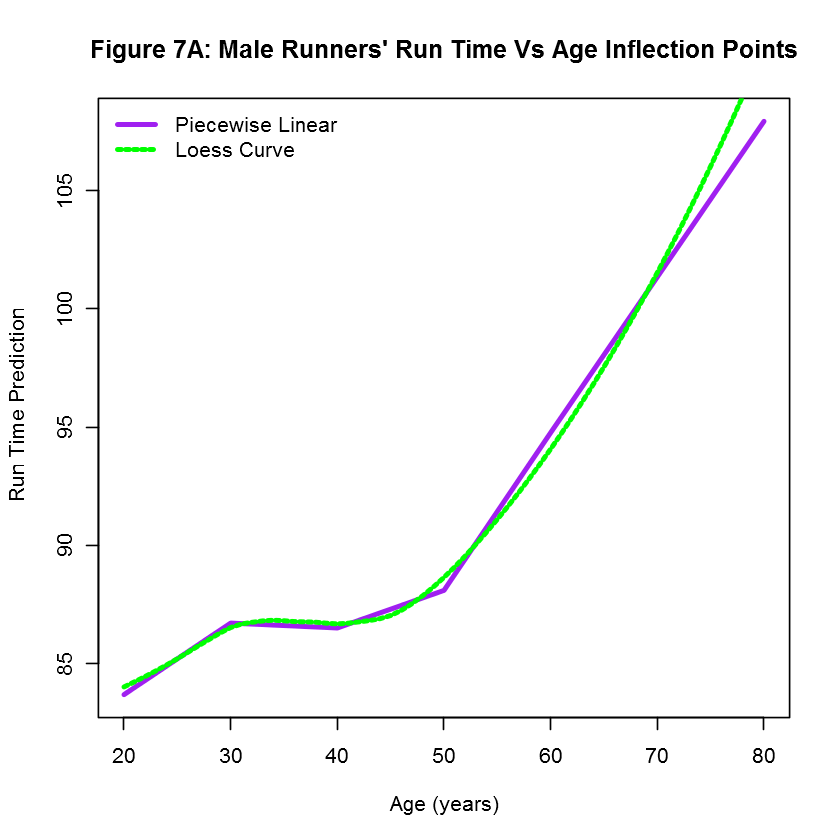

In [14]:
menRes.lo = loess(runTime ~ age, cbMenSub)
menRes.lo.pr = predict(menRes.lo, data.frame(age = age20to80))

over50 = pmax(0, cbMenSub$age - 50)
lmOver50 = lm(runTime ~ age + over50, data = cbMenSub)
summary(lmOver50)

decades = seq(30, 60, by = 10)
overAge = lapply(decades, function(x) pmax(0, (cbMenSub$age - x)))
names(overAge) = paste("over", decades, sep = "")
overAge = as.data.frame(overAge)

lmPiecewise = lm(runTime ~ . , data = cbind(cbMenSub[, c("runTime", "age")], overAge))
summary(lmPiecewise)

overAge20 = lapply(decades, function(x) pmax(0, (age20to80 - x)))
names(overAge20) = paste("over", decades, sep = "")
overAgeDF = cbind(age = data.frame(age = age20to80), overAge20)

predPiecewise = predict(lmPiecewise, overAgeDF)
plot(predPiecewise ~ age20to80,
     type = "l", col = "purple", lwd = 3,
     xlab = "Age (years)", ylab = "Run Time Prediction")
title(main = "Figure 7A: Male Runners' Run Time Vs Age Inflection Points")

lines(x = age20to80, y = menRes.lo.pr, 
      col = "green", lty = 2, lwd = 3)
legend("topleft", col = c("purple", "green"),
       lty = c(1, 2), lwd= 3,
       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")


Call:
lm(formula = runTime ~ age + over50, data = cbWomenSub)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.955  -9.444  -0.652   8.634  79.390 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 92.717355   0.226071  410.12   <2e-16 ***
age          0.154541   0.006707   23.04   <2e-16 ***
over50       0.380412   0.033828   11.24   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.1 on 75947 degrees of freedom
Multiple R-squared:  0.01793,	Adjusted R-squared:  0.0179 
F-statistic: 693.1 on 2 and 75947 DF,  p-value: < 2.2e-16



Call:
lm(formula = runTime ~ ., data = cbind(cbWomenSub[, c("runTime", 
    "age")], overAge))

Residuals:
    Min      1Q  Median      3Q     Max 
-45.974  -9.441  -0.667   8.643  79.549 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 88.52862    0.65095 135.999   <2e-16 ***
age          0.31847    0.02411  13.208   <2e-16 ***
over30      -0.34141    0.03809  -8.964   <2e-16 ***
over40       0.36614    0.04210   8.697   <2e-16 ***
over50       0.10818    0.06887   1.571    0.116    
over60      -0.02880    0.13093  -0.220    0.826    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.09 on 75944 degrees of freedom
Multiple R-squared:  0.01919,	Adjusted R-squared:  0.01913 
F-statistic: 297.2 on 5 and 75944 DF,  p-value: < 2.2e-16


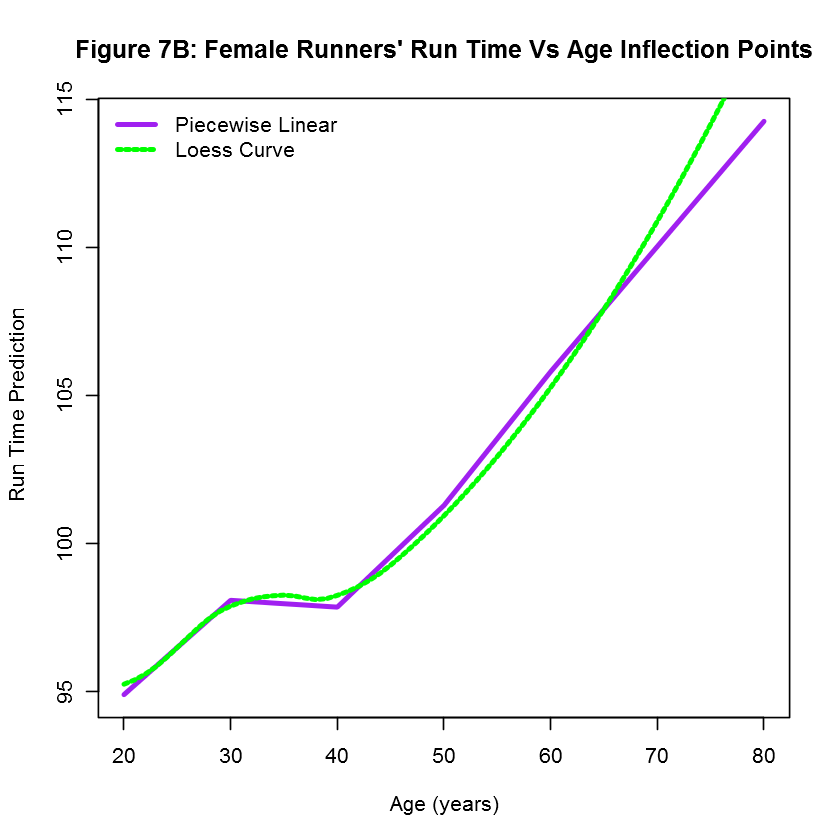

In [15]:
womenRes.lo = loess(runTime ~ age, cbWomenSub)
womenRes.lo.pr = predict(womenRes.lo, data.frame(age = age20to80))

over50 = pmax(0, cbWomenSub$age - 50)
lmOver50 = lm(runTime ~ age + over50, data = cbWomenSub)
summary(lmOver50)

decades = seq(30, 60, by = 10)
overAge = lapply(decades, function(x) pmax(0, (cbWomenSub$age - x)))
names(overAge) = paste("over", decades, sep = "")
overAge = as.data.frame(overAge)

lmPiecewise = lm(runTime ~ . , data = cbind(cbWomenSub[, c("runTime", "age")], overAge))
summary(lmPiecewise)

overAge20 = lapply(decades, function(x) pmax(0, (age20to80 - x)))
names(overAge20) = paste("over", decades, sep = "")
overAgeDF = cbind(age = data.frame(age = age20to80), overAge20)

predPiecewise = predict(lmPiecewise, overAgeDF)
plot(predPiecewise ~ age20to80,
     type = "l", col = "purple", lwd = 3,
     xlab = "Age (years)", ylab = "Run Time Prediction")
title(main = "Figure 7B: Female Runners' Run Time Vs Age Inflection Points")

lines(x = age20to80, y = womenRes.lo.pr, 
      col = "green", lty = 2, lwd = 3)
legend("topleft", col = c("purple", "green"),
       lty = c(1, 2), lwd= 3,
       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")

### Density Curve

The race from 1999 to 2012 increased the number of participants from 3000 to 7000 for male runners and from 2000 to 10000 for female runners [Figure 8]. An interactive stacked density plot shows the gradual change in age participation per gender for every year [Figure 9].

As noted in the boxplots, there is a decrease in mean age. where the shape in density plots peak at age 40 in 1999 and peaks at age 29 in 2012 for males [Figure 9A and 10A]. For females, it is less obvious when plotting 1999 and 2012 but the trend in years in between also shows a slight decline in the age with the most participants [Figure 9B and 10B].

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  46.98   74.80   84.28   84.34   93.08  170.83 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  45.25   77.56   87.46   88.43   97.78  150.98 

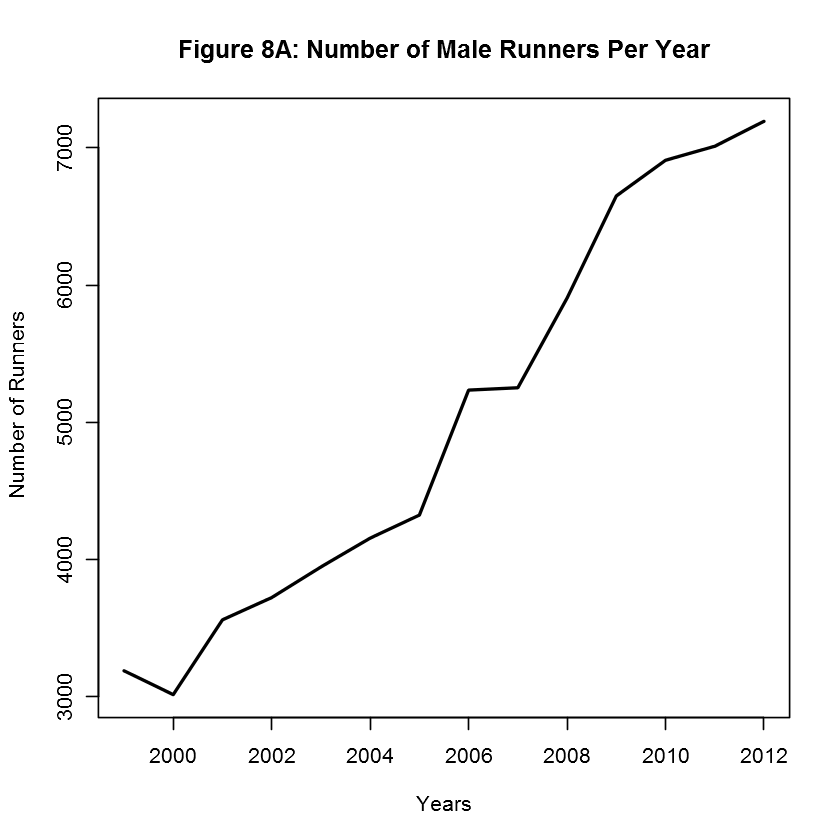

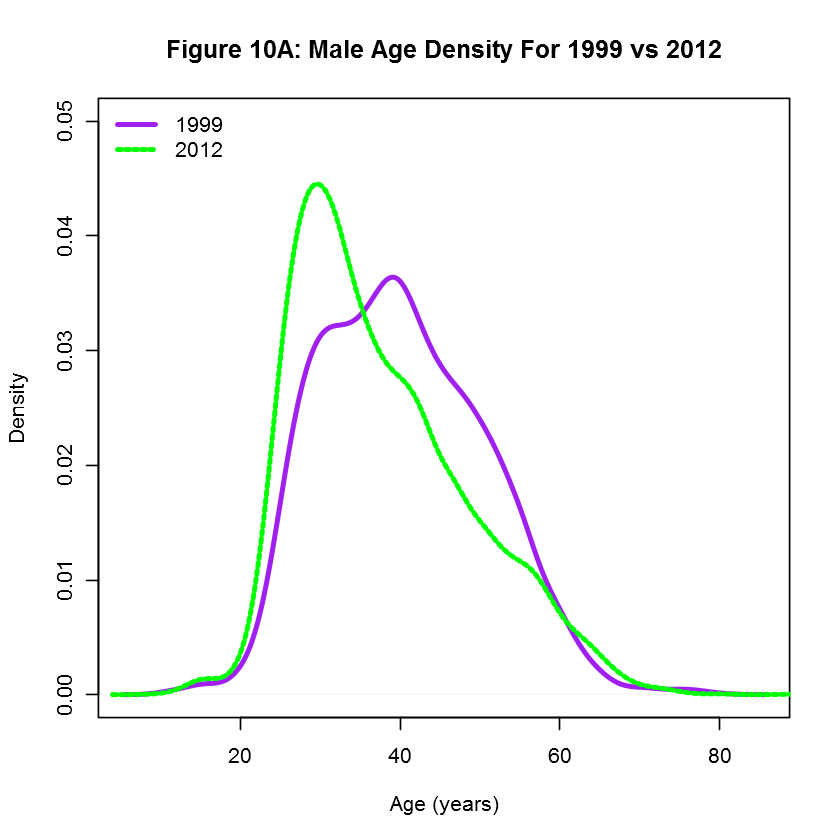

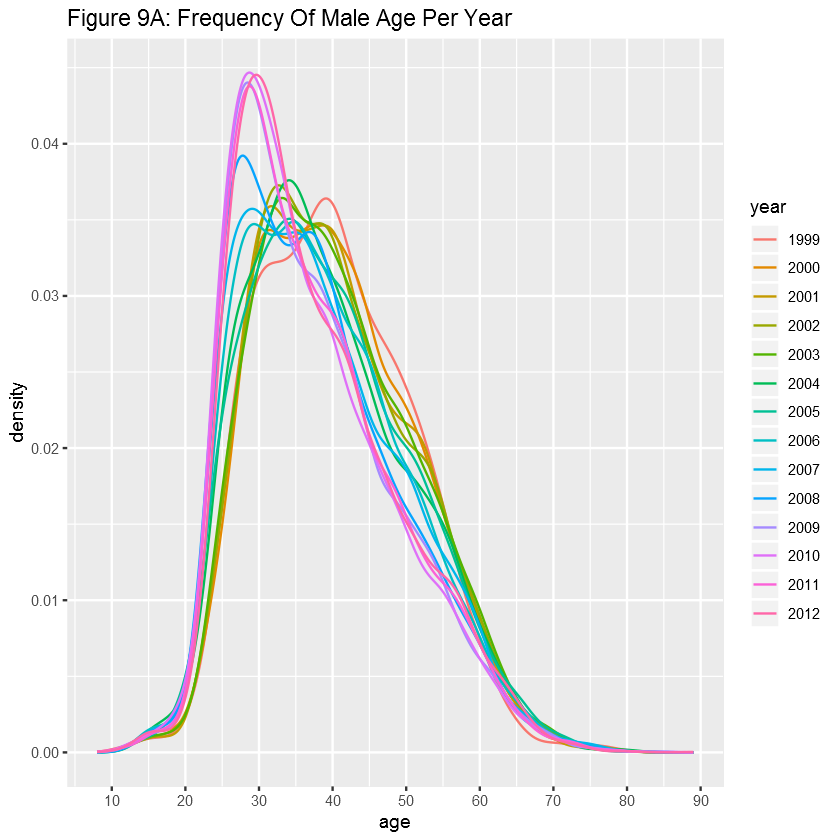

In [16]:
numRunners = with(cbMen, tapply(runTime, year, length))
plot(numRunners ~ names(numRunners), type="l", lwd = 2,
     xlab = "Years", ylab = "Number of Runners")
title(main = "Figure 8A: Number of Male Runners Per Year")

summary(cbMenSub$runTime[cbMenSub$year == 1999])
summary(cbMenSub$runTime[cbMenSub$year == 2012])

Mage1999 = cbMenSub[ cbMenSub$year == 1999, "age" ]
Mage2012 = cbMenSub[ cbMenSub$year == 2012, "age" ]

plot(density(Mage1999, na.rm = TRUE), 
     ylim = c(0, 0.05), col = "purple",
     lwd = 3,  xlab = "Age (years)",  main = "")
title(main = "Figure 10A: Male Age Density For 1999 vs 2012")
lines(density(Mage2012, na.rm = TRUE), 
      lwd = 3, lty = 2, col="green")
legend("topleft", col = c("purple", "green"), lty= 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")

ggplot(cbMensPlot, aes(age, color = year)) + scale_x_continuous(breaks = pretty(cbMensPlot$age, n = 10)) + 
    ggtitle("Figure 9A: Frequency Of Male Age Per Year") + geom_line(stat="density")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  53.62   87.20   95.17   95.54  103.85  165.30 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  54.03   89.08   98.03   99.02  107.90  170.97 

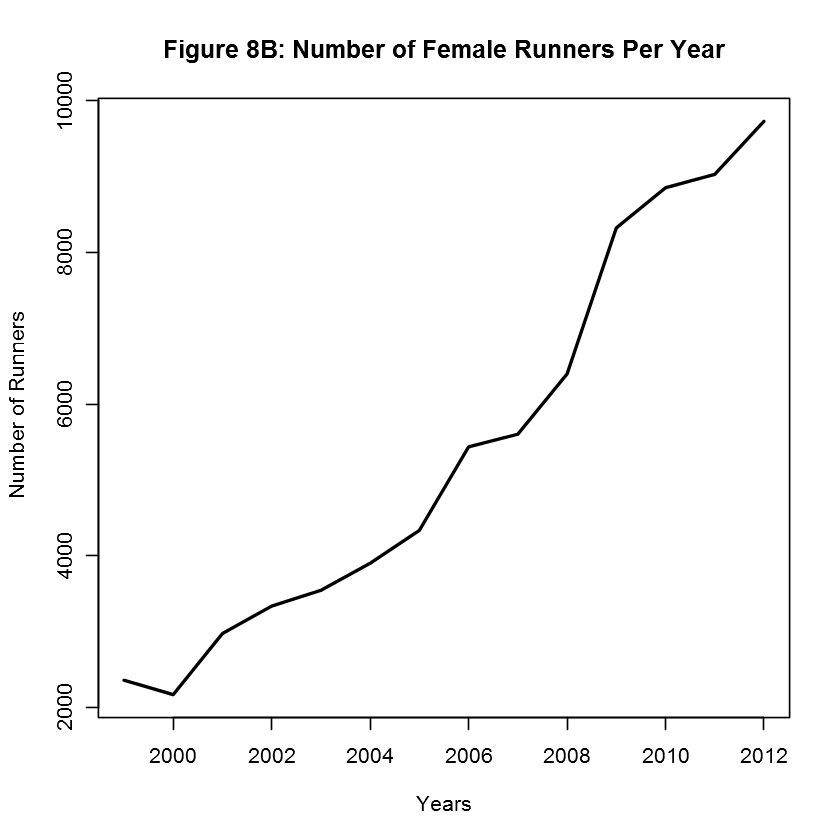

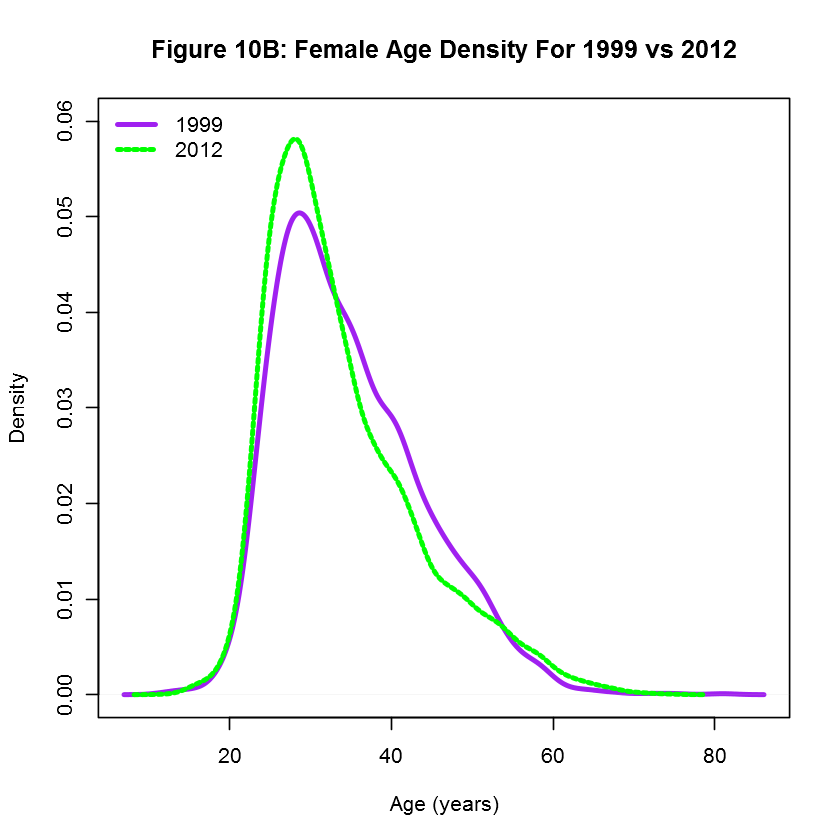

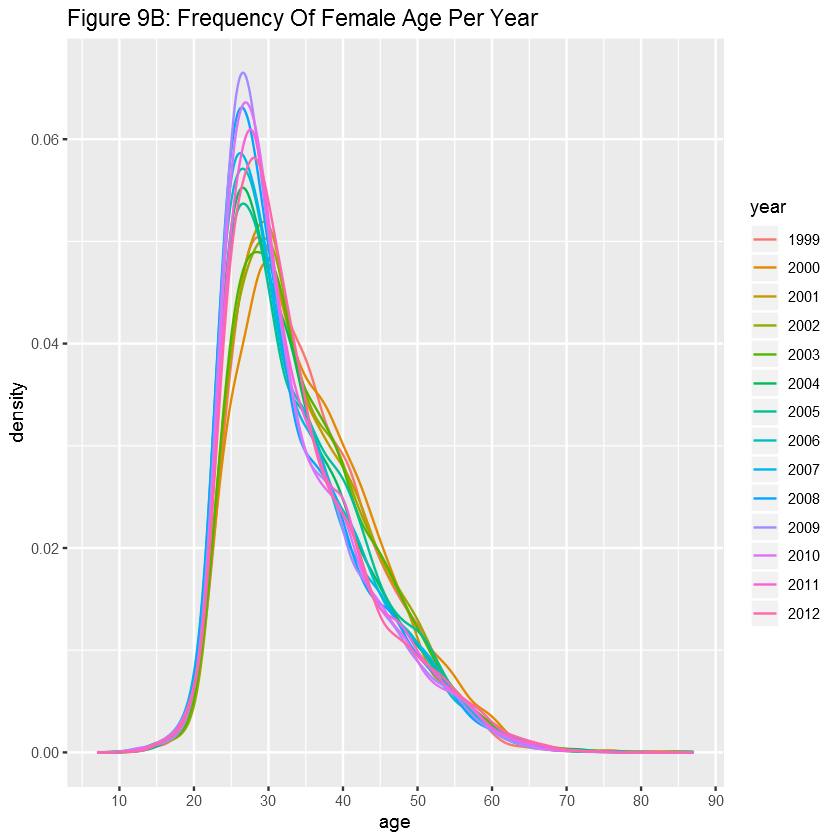

In [17]:
numRunners = with(cbWomen, tapply(runTime, year, length))
plot(numRunners ~ names(numRunners), type="l", lwd = 2,
     xlab = "Years", ylab = "Number of Runners")
title(main = "Figure 8B: Number of Female Runners Per Year")

summary(cbWomenSub$runTime[cbWomenSub$year == 1999])
summary(cbWomenSub$runTime[cbWomenSub$year == 2012])

Wage1999 = cbWomenSub[ cbWomenSub$year == 1999, "age" ]
Wage2012 = cbWomenSub[ cbWomenSub$year == 2012, "age" ]

plot(density(Wage1999, na.rm = TRUE), 
     ylim = c(0, 0.06), col = "purple",
     lwd = 3,  xlab = "Age (years)",  main = "")
title(main = "Figure 10B: Female Age Density For 1999 vs 2012")
lines(density(Wage2012, na.rm = TRUE), 
      lwd = 3, lty = 2, col="green")
legend("topleft", col = c("purple", "green"), lty= 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")

ggplot(cbWomensPlot, aes(age, color = year)) + scale_x_continuous(breaks = pretty(cbWomensPlot$age, n = 10)) +
        ggtitle("Figure 9B: Frequency Of Female Age Per Year") + geom_line(stat="density")

### Quantile-Quantile (Q-Q) Plots
When the Q-Q plots between 1999 and 2012 data are compared, the dataset shows that it deviates from the normalized line, where there are more participants from age 25 to 55 in 2012 and there are more participants from age 55 to 70 for 1999 in the male dataset [Figure 11A]. For the female dataset, the deviation from the normalized line is more dampened, yet there are more participants from age 30 to 50 in 2012 and there are more participants from age 50 to 70 in 1999 [Figure 11B].

We also compared age distributions across all years against a normalized line to compare the gradual change in age participation shape. For male runners in 1999, the Q-Q plot is relatively flat against the normal where age participation is slightly increased between age 25 and 35 and then flattens out between age 35 to 60 [Figure 11A]. For male runners in 2012, the Q-Q plot is much more curved against the normal where age participation is much higher between age 25 and 45 and the ages outside that range is much more diminished in participation [Figure 11A]. For female runners in 1999, the Q-Q plot is relatively flat against the normal where age participation is slightly increased between age 25 and 35 yet curves more than that for the male dataset [Figure 12A]. For female runners in 2012, the Q-Q plot is more curved against the normal where age participation is much higher between age 25 and 40 and the ages outside that range is diminished in participation [Figure 11B].

When plotting run time and age, runners in 1999 for every age category is faster than their counterparts in 2012 [Figure 12]. When plotting for the difference in run time and age for males, 40 year olds had the highest increase in time and 55 year olds had the highest decrease in time, which may be due to those same runners aging in the 14-year span that the dataset was taken [figure 13A]. When plotting for the difference in run time and age for females, 37 year olds had the highest increase in time and 52 year olds had the highest decrease in time, which may be due to those same runners aging in the 14-year span that the dataset was taken [figure 13B].

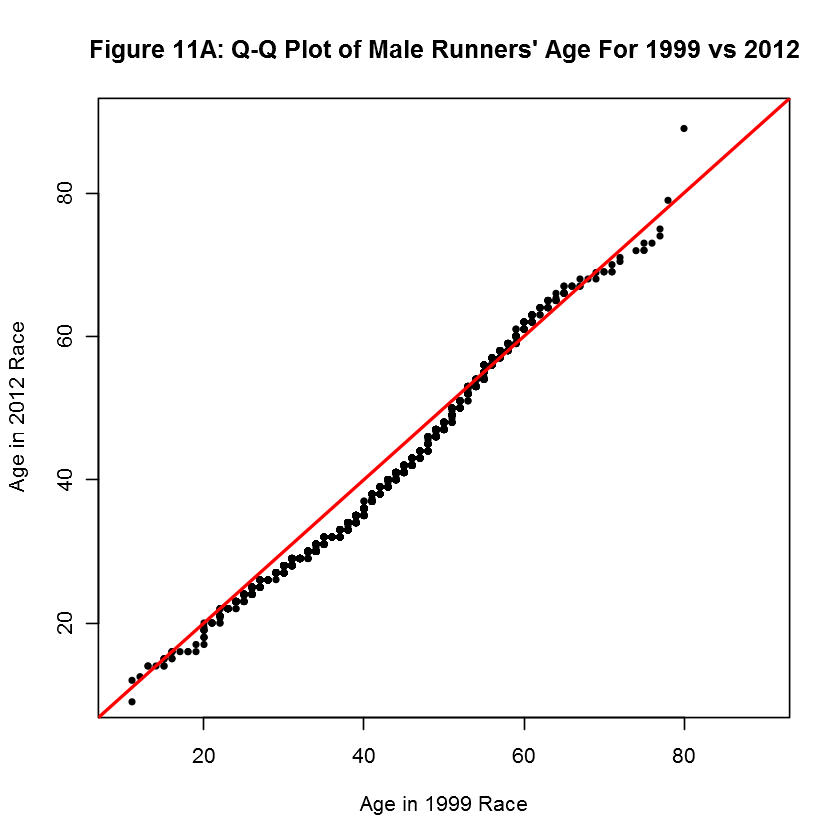

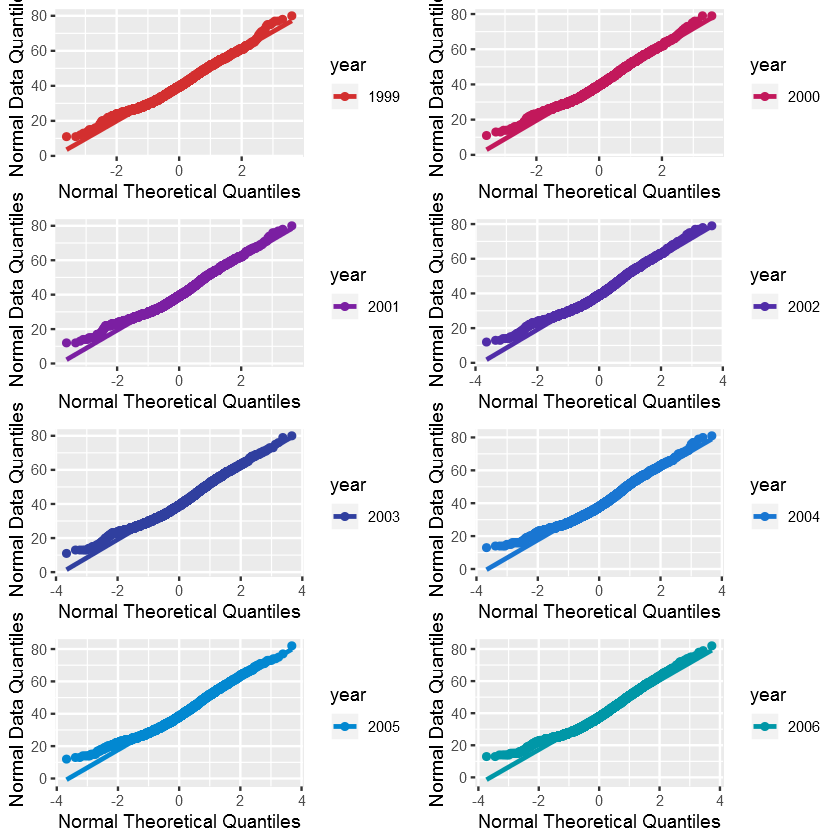

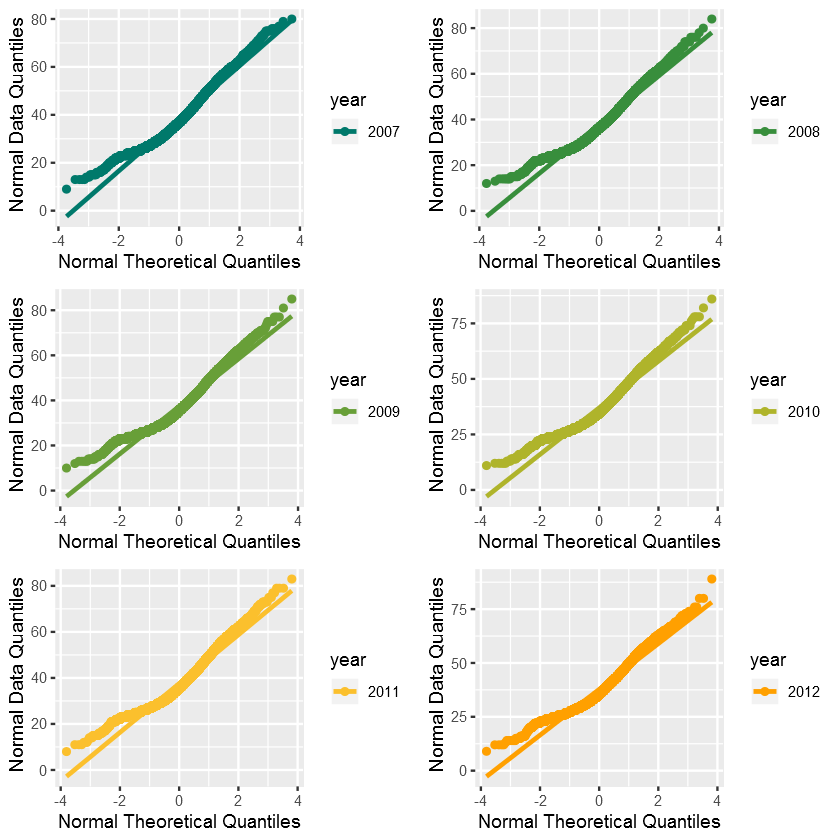

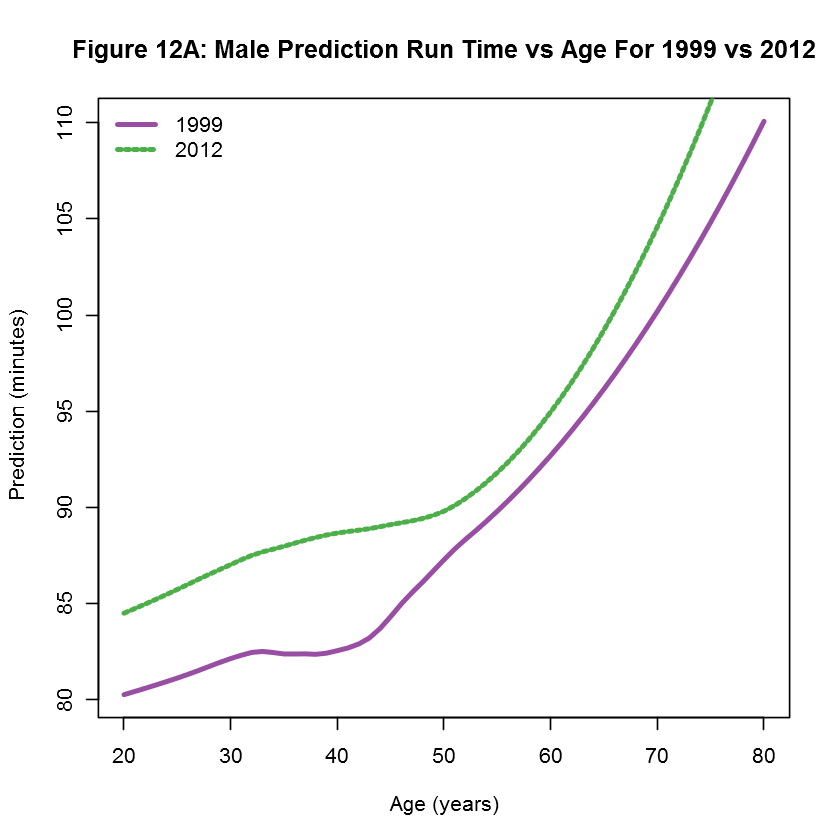

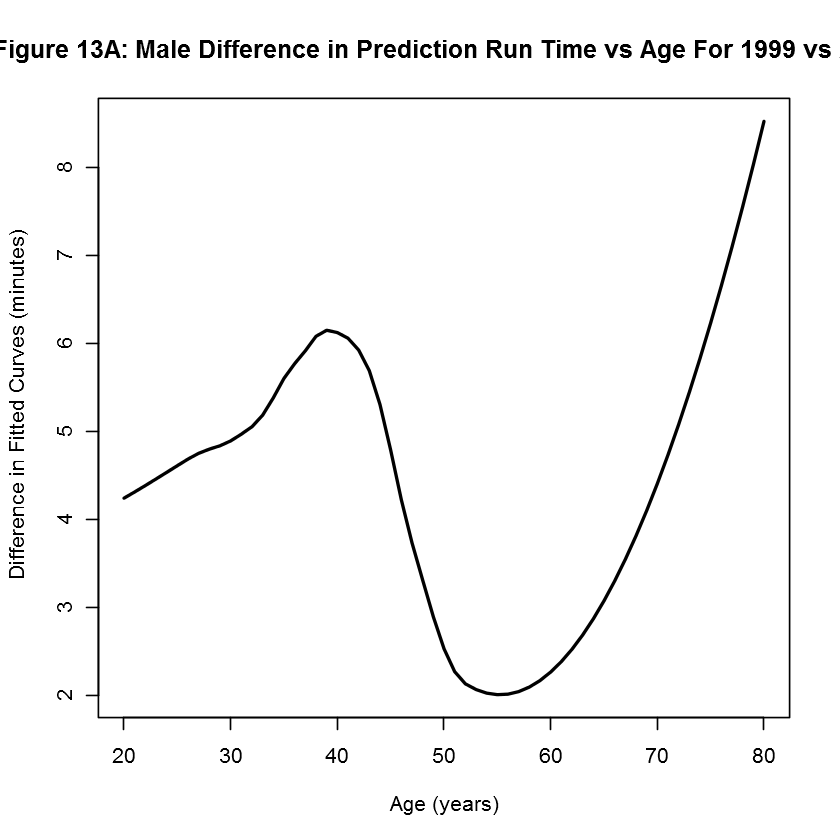

In [18]:
qqplot(Mage1999, Mage2012, pch = 19, cex = 0.5, 
       ylim = c(10,90), xlim = c(10,90), 
       xlab = "Age in 1999 Race",
       ylab = "Age in 2012 Race", 
       main = "Figure 11A: Q-Q Plot of Male Runners' Age For 1999 vs 2012")
abline(a =0, b = 1, col="red", lwd = 2)

# https://stackoverflow.com/questions/19599745/qqline-in-ggplot2-with-facets/19600903#19600903

plot.list <- list()
i = 1
for(yr in unique(cbMensPlot$year)){
    cbMensPlotQQ <- ddply(.data = subset(cbMensPlot, cbMensPlot$year == yr), .variables = .(year),
                          function(dsub){
                              q <- qqnorm(dsub$age, plot = FALSE)
                              dsub$xq <- q$x
                              dsub
                          })
    
    age.qq = ggplot(data = cbMensPlotQQ, aes(x = xq, y = age, color = year)) +
                    geom_point() +
                    geom_smooth(method = "lm", se = FALSE) +
                    xlab("Normal Theoretical Quantiles") +
                    ylab("Normal Data Quantiles")
    
    if(i==1) plot.list[[i]] <- age.qq + scale_color_manual(values='#D32F2F')
    if(i==2) plot.list[[i]] <- age.qq + scale_color_manual(values='#C2185B')
    if(i==3) plot.list[[i]] <- age.qq + scale_color_manual(values='#7B1FA2')
    if(i==4) plot.list[[i]] <- age.qq + scale_color_manual(values='#512DA8')
    if(i==5) plot.list[[i]] <- age.qq + scale_color_manual(values='#303F9F')
    if(i==6) plot.list[[i]] <- age.qq + scale_color_manual(values='#1976D2')
    if(i==7) plot.list[[i]] <- age.qq + scale_color_manual(values='#0288D1')
    if(i==8) plot.list[[i]] <- age.qq + scale_color_manual(values='#0097A7')
    if(i==9) plot.list[[i]] <- age.qq + scale_color_manual(values='#00796B')
    if(i==10) plot.list[[i]] <- age.qq + scale_color_manual(values='#388E3C')
    if(i==11) plot.list[[i]] <- age.qq + scale_color_manual(values='#689F38')
    if(i==12) plot.list[[i]] <- age.qq + scale_color_manual(values='#AFB42B')
    if(i==13) plot.list[[i]] <- age.qq + scale_color_manual(values='#FBC02D')
    if(i==14) plot.list[[i]] <- age.qq + scale_color_manual(values='#FFA000')
    i = i + 1
}

grid.arrange(plot.list[[1]], 
             plot.list[[2]],
             plot.list[[3]],
             plot.list[[4]],
             plot.list[[5]],
             plot.list[[6]],
             plot.list[[7]],
             plot.list[[8]], ncol=2)
        
grid.arrange(plot.list[[9]],
             plot.list[[10]],
             plot.list[[11]],
             plot.list[[12]],
             plot.list[[13]],
             plot.list[[14]], ncol=2)

mR.lo99 = loess(runTime ~ age, cbMenSub[ cbMenSub$year == 1999,])
mR.lo.pr99 = predict(mR.lo99, data.frame(age = age20to80))

mR.lo12 = loess(runTime ~ age, cbMenSub[ cbMenSub$year == 2012,])
mR.lo.pr12 = predict(mR.lo12, data.frame(age = age20to80))

plot(mR.lo.pr99 ~ age20to80,
     type = "l", col = "#984ea3", lwd = 3,
     xlab = "Age (years)", ylab = "Prediction (minutes)")
title(main = "Figure 12A: Male Prediction Run Time vs Age For 1999 vs 2012")

lines(x = age20to80, y = mR.lo.pr12, col="#4daf4a", lty = 2, lwd = 3) 
legend("topleft", col = c("#984ea3", "#4daf4a"), lty = 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")

gap14 = mR.lo.pr12 - mR.lo.pr99

plot(gap14 ~ age20to80, type = "l" , xlab = "Age (years)", 
     ylab = "Difference in Fitted Curves (minutes)", lwd = 2)
title(main = "Figure 13A: Male Difference in Prediction Run Time vs Age For 1999 vs 2012")

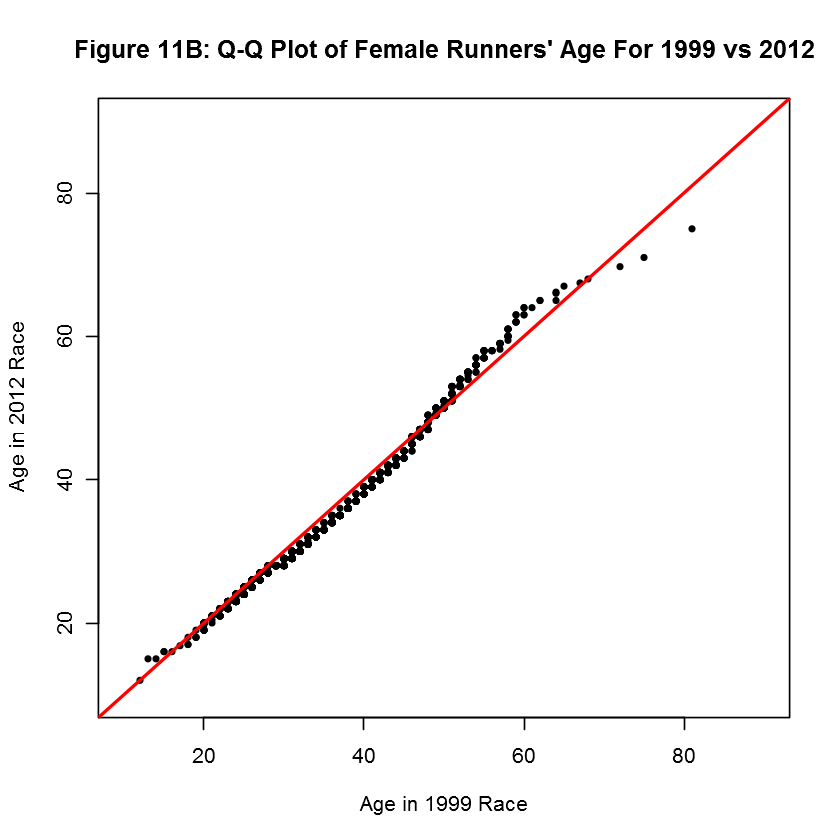

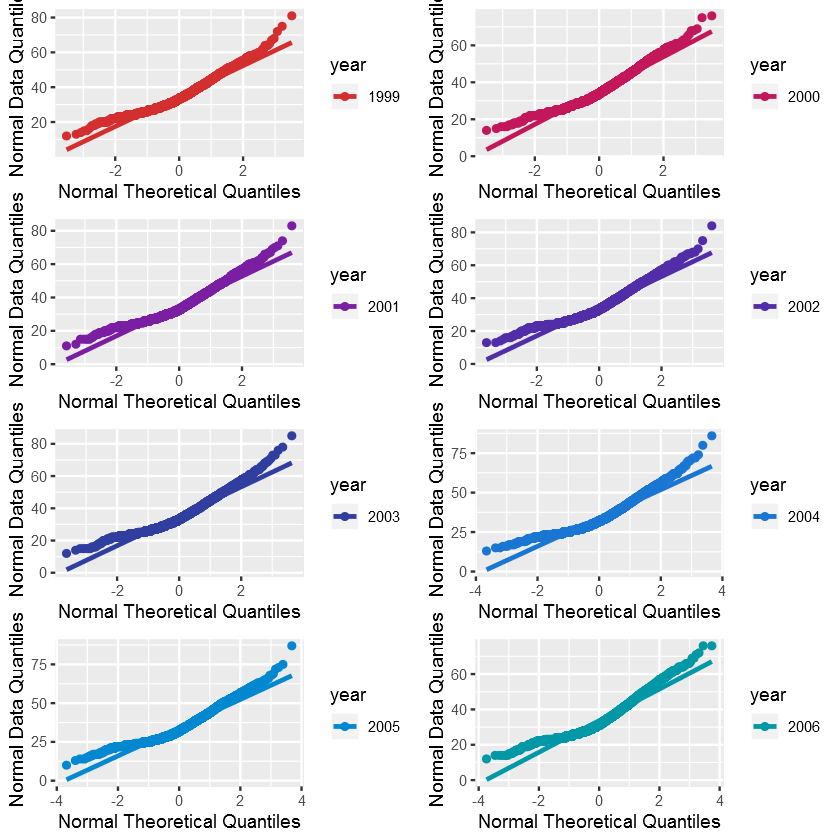

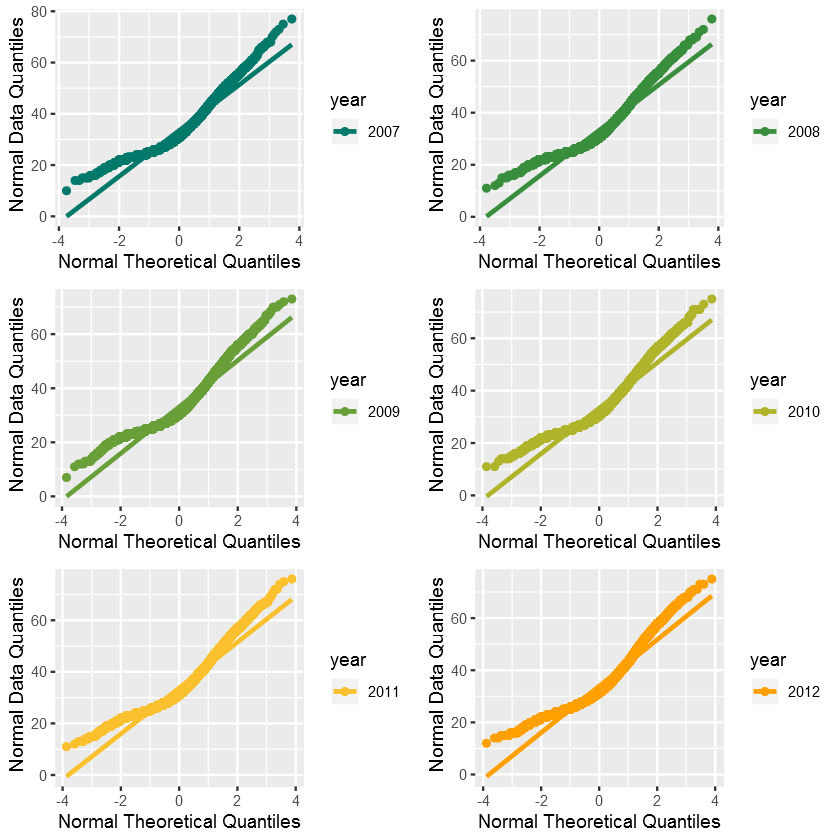

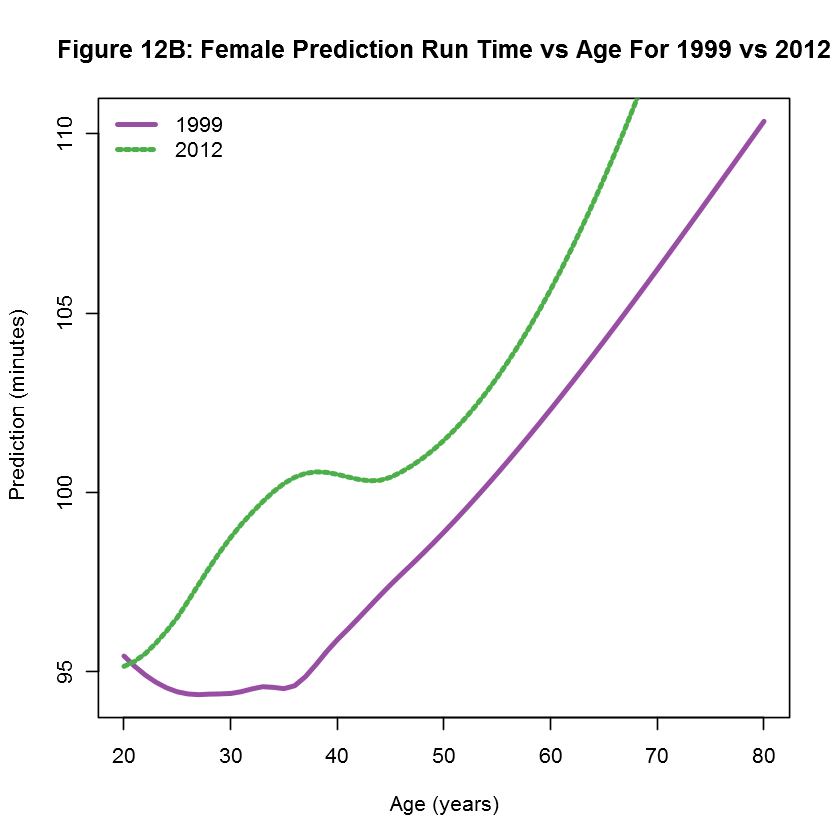

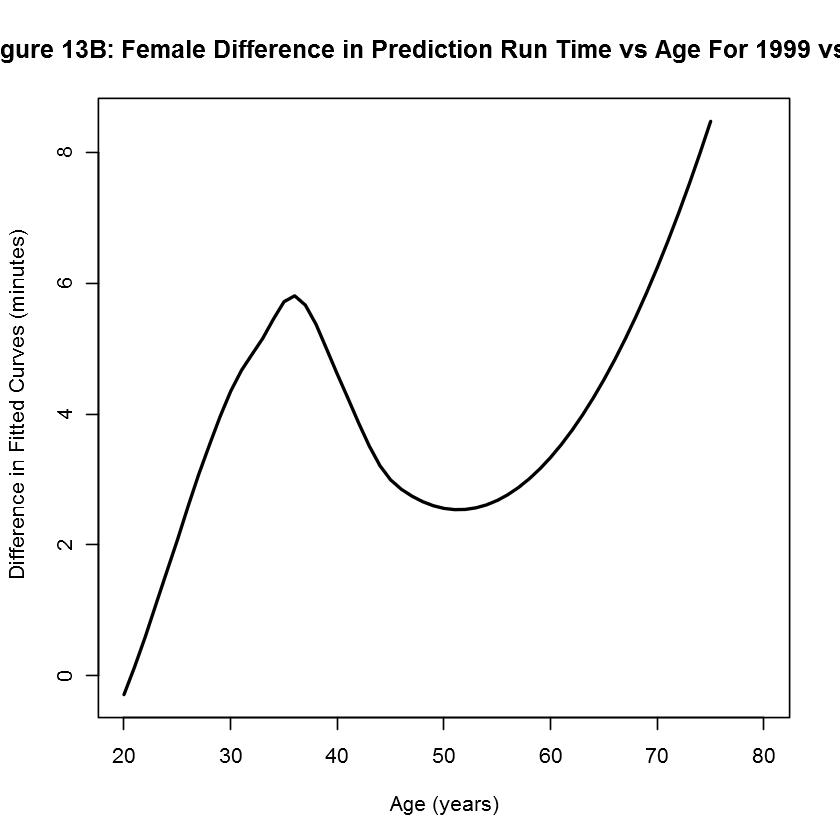

In [19]:
qqplot(Wage1999, Wage2012, pch = 19, cex = 0.5, 
       ylim = c(10,90), xlim = c(10,90), 
       xlab = "Age in 1999 Race",
       ylab = "Age in 2012 Race", 
       main = "Figure 11B: Q-Q Plot of Female Runners' Age For 1999 vs 2012")
abline(a =0, b = 1, col="red", lwd = 2)

# https://stackoverflow.com/questions/19599745/qqline-in-ggplot2-with-facets/19600903#19600903

plot.list <- list()
i = 1
for(yr in unique(cbWomensPlot$year)){
    cbWomensPlotQQ <- ddply(.data = subset(cbWomensPlot, cbWomensPlot$year == yr), .variables = .(year),
                          function(dsub){
                              q <- qqnorm(dsub$age, plot = FALSE)
                              dsub$xq <- q$x
                              dsub
                          })
    
    age.qq = ggplot(data = cbWomensPlotQQ, aes(x = xq, y = age, color = year)) +
                    geom_point() +
                    geom_smooth(method = "lm", se = FALSE) +
                    xlab("Normal Theoretical Quantiles") +
                    ylab("Normal Data Quantiles")
    
    if(i==1) plot.list[[i]] <- age.qq + scale_color_manual(values='#D32F2F')
    if(i==2) plot.list[[i]] <- age.qq + scale_color_manual(values='#C2185B')
    if(i==3) plot.list[[i]] <- age.qq + scale_color_manual(values='#7B1FA2')
    if(i==4) plot.list[[i]] <- age.qq + scale_color_manual(values='#512DA8')
    if(i==5) plot.list[[i]] <- age.qq + scale_color_manual(values='#303F9F')
    if(i==6) plot.list[[i]] <- age.qq + scale_color_manual(values='#1976D2')
    if(i==7) plot.list[[i]] <- age.qq + scale_color_manual(values='#0288D1')
    if(i==8) plot.list[[i]] <- age.qq + scale_color_manual(values='#0097A7')
    if(i==9) plot.list[[i]] <- age.qq + scale_color_manual(values='#00796B')
    if(i==10) plot.list[[i]] <- age.qq + scale_color_manual(values='#388E3C')
    if(i==11) plot.list[[i]] <- age.qq + scale_color_manual(values='#689F38')
    if(i==12) plot.list[[i]] <- age.qq + scale_color_manual(values='#AFB42B')
    if(i==13) plot.list[[i]] <- age.qq + scale_color_manual(values='#FBC02D')
    if(i==14) plot.list[[i]] <- age.qq + scale_color_manual(values='#FFA000')
    i = i + 1
}

grid.arrange(plot.list[[1]], 
             plot.list[[2]],
             plot.list[[3]],
             plot.list[[4]],
             plot.list[[5]],
             plot.list[[6]],
             plot.list[[7]],
             plot.list[[8]], ncol=2)
        
grid.arrange(plot.list[[9]],
             plot.list[[10]],
             plot.list[[11]],
             plot.list[[12]],
             plot.list[[13]],
             plot.list[[14]], ncol=2)

wR.lo99 = loess(runTime ~ age, cbWomenSub[ cbWomenSub$year == 1999,])
wR.lo.pr99 = predict(wR.lo99, data.frame(age = age20to80))

wR.lo12 = loess(runTime ~ age, cbWomenSub[ cbWomenSub$year == 2012,])
wR.lo.pr12 = predict(wR.lo12, data.frame(age = age20to80))

plot(wR.lo.pr99 ~ age20to80,
     type = "l", col = "#984ea3", lwd = 3,
     xlab = "Age (years)", ylab = "Prediction (minutes)")
title(main = "Figure 12B: Female Prediction Run Time vs Age For 1999 vs 2012")

lines(x = age20to80, y = wR.lo.pr12, col="#4daf4a", lty = 2, lwd = 3) 
legend("topleft", col = c("#984ea3", "#4daf4a"), lty = 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")

gap14 = wR.lo.pr12 - wR.lo.pr99

plot(gap14 ~ age20to80, type = "l" , xlab = "Age (years)", 
     ylab = "Difference in Fitted Curves (minutes)", lwd = 2)
title(main = "Figure 13B: Female Difference in Prediction Run Time vs Age For 1999 vs 2012")

The fastest time when fitted with a trendline for males is at age 32 and for females is at age 30 [Figure 14], where the data for 70 year olds for males is missing. The density plot shows the frequency for male run time decreases by 2 minutes from 1999 to 2012 and barely changes for females in the same time span [Figure 16]. As more density plots for runners are compared over the years, not only does run time decrease, but also the density curve of the run time distribution becomes wider for both genders [Figure 15].

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.856   1.425   1.604   1.621   1.802   2.902       1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.9058  1.5033  1.7097  1.7351  1.9364  3.0773       2 

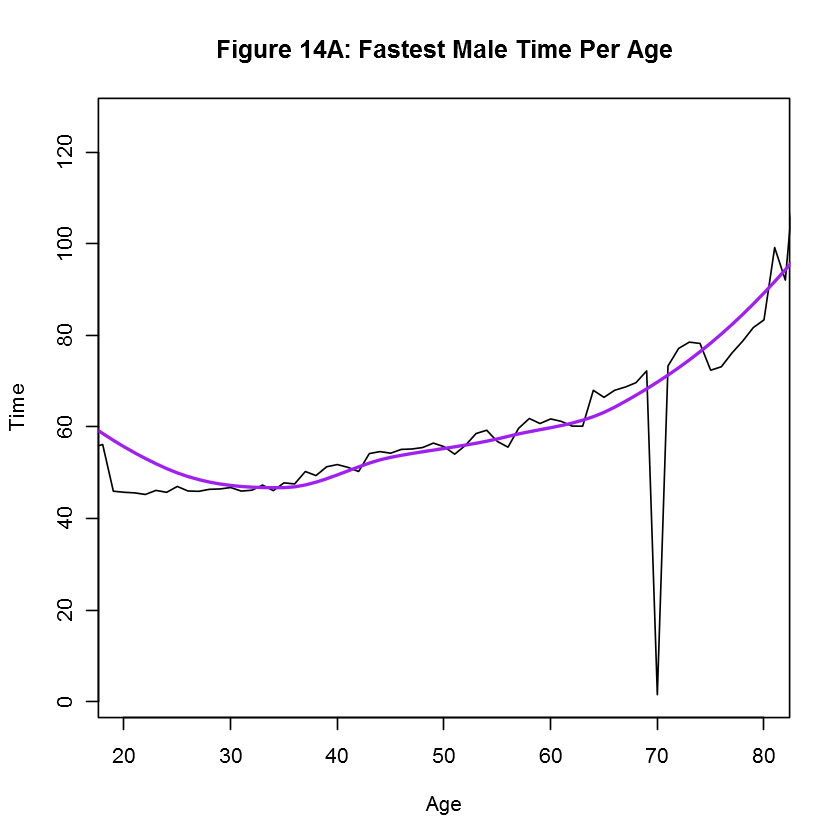

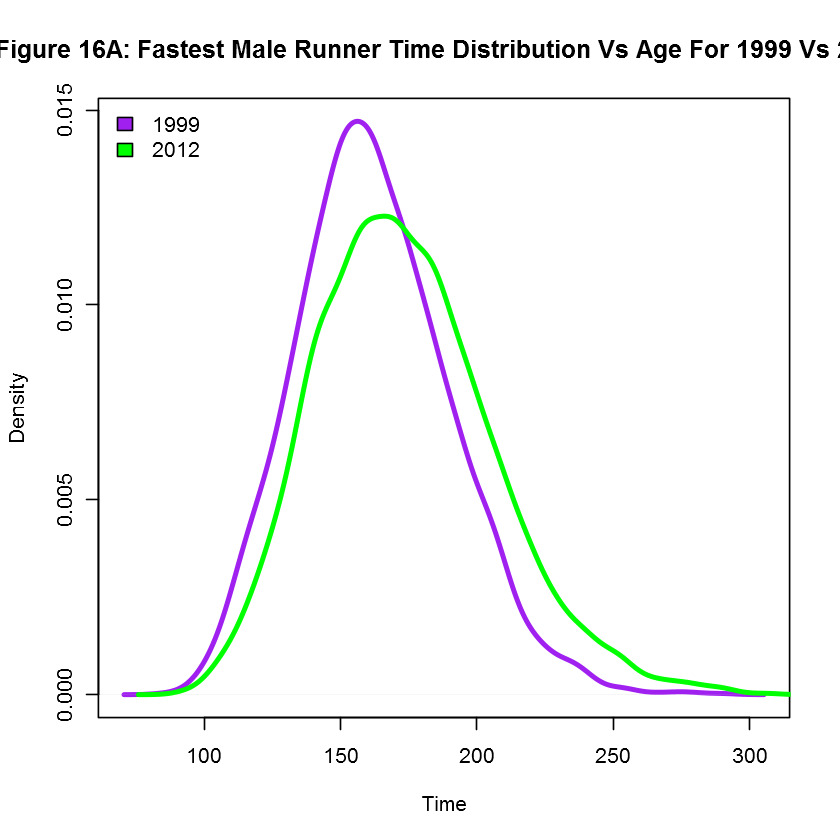

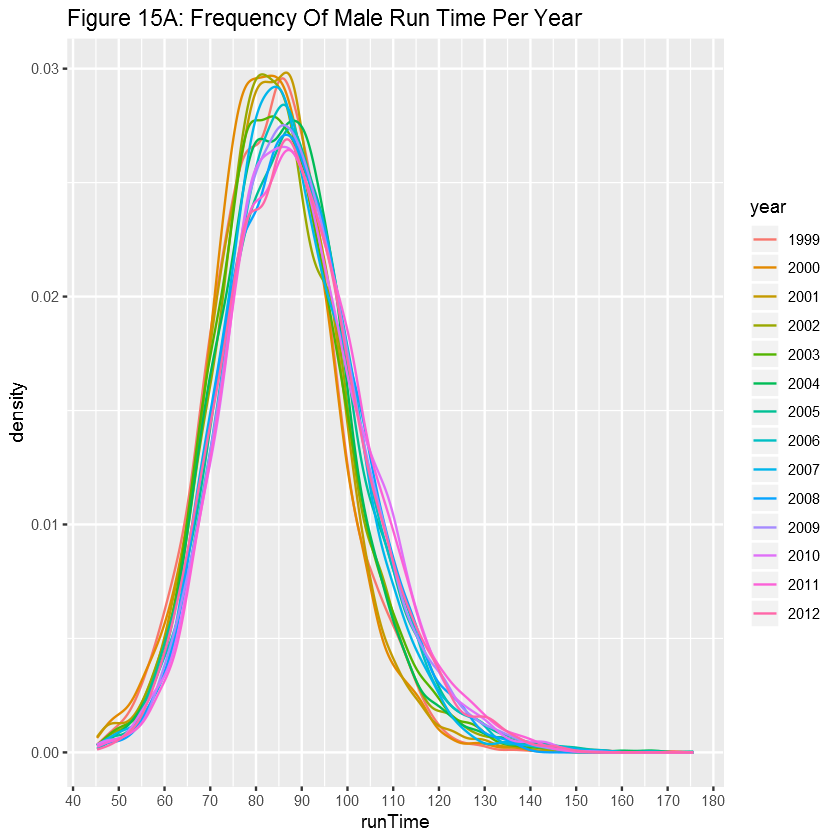

In [20]:
fastestMan = tapply(cbMen$runTime, cbMen$age, min, na.rm = TRUE)
plot(fastestMan ~ names(fastestMan), type ="l", ylab = "Time", xlab = "Age", xlim = c(20, 80))
title(main = "Figure 14A: Fastest Male Time Per Age")

ageFM = as.numeric(names(fastestMan))
mR.loF = loess(fastestMan ~ ageFM)
mR.lo.prF = predict(mR.loF, data.frame(age = ageFM), se = FALSE)
lines(x = ageFM, y = mR.lo.prF, col = "purple", lwd = 2)

timeNorm = cbMen$runTime / mR.lo.prF[as.character(cbMen$age)]
time99Norm = timeNorm[cbMen$year == 1999]
time12Norm = timeNorm[cbMen$year == 2012]
summary(time99Norm)
summary(time12Norm)

plot(density(100*time99Norm, na.rm = TRUE), 
    # ylim = c(0, 0.05), 
     col = "purple", lwd = 3,  xlab = "Time",
     main = "Figure 16A: Fastest Male Runner Time Distribution Vs Age For 1999 Vs 2012")
lines(density(100*time12Norm, na.rm = TRUE), lwd = 3, col = "green")
legend("topleft", fill = c("purple", "green"), legend = c("1999", "2012"), bty = "n")

ggplot(cbMensPlot, aes(runTime, color = year)) + scale_x_continuous(breaks = pretty(cbMensPlot$runTime, n = 10)) +
        ggtitle("Figure 15A: Frequency Of Male Run Time Per Year") + geom_line(stat="density")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.8585  1.4741  1.6482  1.6394  1.8008  2.7854       5 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7506  1.5222  1.7058  1.7128  1.8946  2.8464 

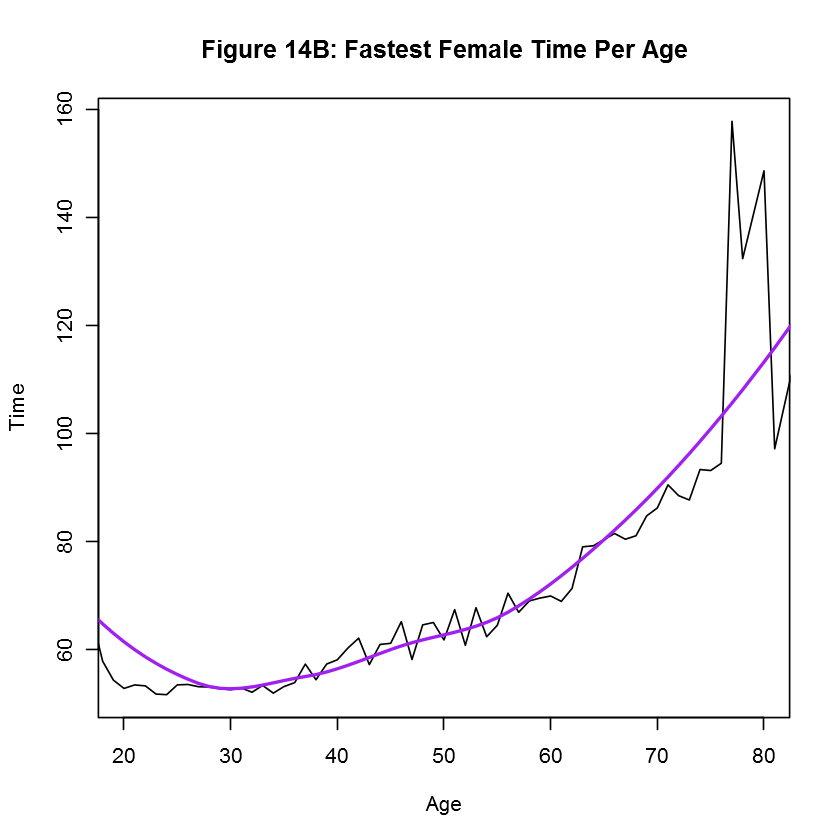

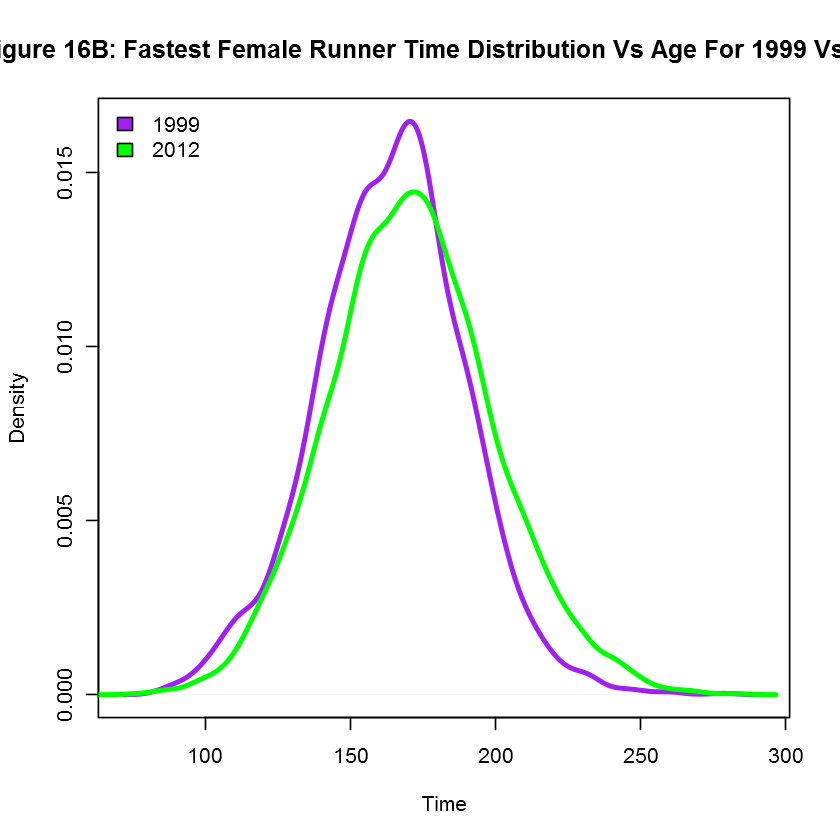

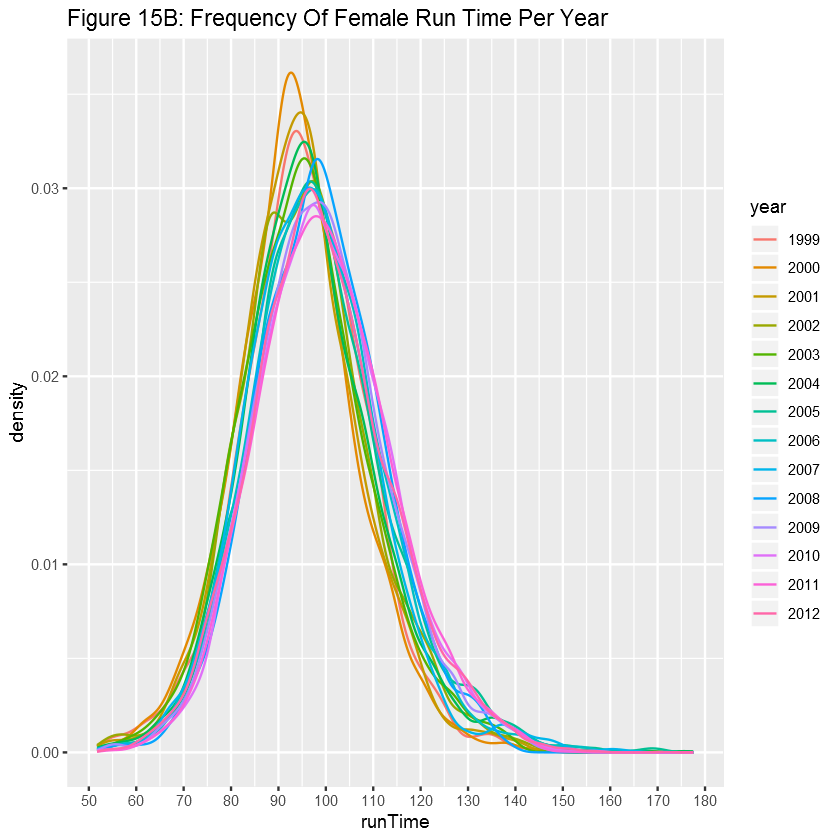

In [21]:
fastestWoman = tapply(cbWomen$runTime, cbWomen$age, min, na.rm = TRUE)
plot(fastestWoman ~ names(fastestWoman), type ="l", ylab = "Time", xlab = "Age", xlim = c(20, 80))
title(main = "Figure 14B: Fastest Female Time Per Age")

ageFW = as.numeric(names(fastestWoman))
wR.loF = loess(fastestWoman ~ ageFW)
wR.lo.prF = predict(wR.loF, data.frame(age = ageFW), se = FALSE)
lines(x = ageFW, y = wR.lo.prF, col = "purple", lwd = 2)

timeNorm = cbWomen$runTime / wR.lo.prF[as.character(cbWomen$age)]
time99Norm = timeNorm[cbWomen$year == 1999]
time12Norm = timeNorm[cbWomen$year == 2012]
summary(time99Norm)
summary(time12Norm)

plot(density(100*time99Norm, na.rm = TRUE), 
    # ylim = c(0, 0.05), 
     col = "purple", lwd = 3,  xlab = "Time",
     main = "Figure 16B: Fastest Female Runner Time Distribution Vs Age For 1999 Vs 2012")
lines(density(100*time12Norm, na.rm = TRUE), lwd = 3, col = "green")
legend("topleft", fill = c("purple", "green"), legend = c("1999", "2012"), bty = "n")

ggplot(cbWomensPlot, aes(runTime, color = year)) + scale_x_continuous(breaks = pretty(cbWomensPlot$runTime, n = 10)) +
        ggtitle("Figure 15B: Frequency Of Female Run Time Per Year") + geom_line(stat="density")

## Conclusion

For the general population of participating runners between 1999 to 2012, the boxplots show that male ages steadily decrease from an average from 40.33 to 37.75 years old while female ages slightly decrease from 34.90 to 33.88 years old [Figure 1]. The median age is more obvious as male ages declines from 40 to 35 while female ages declines from 33 to 32 due to the right skewedness for both datasets [Figure 1]. Further residual exploration of age shows that age selection has a relatively randomized distribution from the lottery system for runner participation in the race [Figure 6]. The inflection points for both male and female runners conclude that run-time results are the fastest for age 20, increase by age 30, decrease slightly by age 40, increase slightly by age 50, and increase steeply by age 60 and above [Figure 7].

The race from 1999 to 2012 increased the number of participants from 3000 to 7000 for male runners and from 2000 to 10000 for female runners [Figure 8]. Density plots also show that there is a decrease in mean age where it peaks at age 40 in 1999 and peaks at age 29 in 2012 [Figure 9A and 10A]. For females, it is less obvious when plotting 1999 and 2012 but the trend in years in between also shows a slight decline in the age with the most participants [Figure 9B and 10B]. The density plot shows the frequency for male run time decreases by 2 minutes from 1999 to 2012 and barely changes for females in the same time span [Figure 16]. As more density plots for runners are compared over the years, not only does run time decrease, but also the density curve of the run time distribution becomes wider for both genders [Figure 15], which corresponds to the trend that age has a positive influence on run-time result.

When the Q-Q plots between 1999 and 2012 data are compared, the dataset shows that it deviates from the normalized line, where there are more participants from age 25 to 55 in 2012 and there are more participants from age 55 to 70 for 1999 in the male dataset [Figure 11A]. For the female dataset, the deviation from the normalized line is more dampened, yet there are more participants from age 30 to 50 in 2012 and there are more participants from age 50 to 70 in 1999 [Figure 11B]. For male runners in 1999, the Q-Q plot is relatively flat against the normal where age participation is slightly increased between age 25 and 35 and then flattens out between age 35 to 60 [Figure 11A]. For male runners in 2012, the Q-Q plot is much more curved against the normal where age participation is much higher between age 25 and 45 and the ages outside that range is much more diminished in participation [Figure 11A]. For female runners in 1999, the Q-Q plot is relatively flat against the normal where age participation is slightly increased between age 25 and 35 yet curves more than that for the male dataset [Figure 12A]. For female runners in 2012, the Q-Q plot is more curved against the normal where age participation is much higher between age 25 and 40 and the ages outside that range is diminished in participation [Figure 11B].

When plotting run time and age, runners in 1999 for every age category is faster than their counterparts in 2012 [Figure 12]. When plotting for the difference in run time and age for males, 40 year olds had the highest increase in time and 55 year olds had the highest decrease in time, which may be due to those same runners aging in the 14-year span that the dataset was taken [figure 13A]. When plotting for the difference in run time and age for females, 37 year olds had the highest increase in time and 52 year olds had the highest decrease in time, which may be due to those same runners aging in the 14-year span that the dataset was taken [figure 13B]. Although participation increased over the years, the trend show that not only the age and run-time increased over the years, but also those participating runners who aged over the 14 year span decreased the run-time for 55 and 52 year olds for males and females, respectively, where that generations' progress in lowering run-time may be captured in future data. As running become more widespread and ametuerized, we speculate that the decrease in participants' age will slow down moving forward, as seen from 2008 to 2012.

## References

[1] "Credit Union: Cherry Blossom Ten Mile Run and 5K Run-Walk," Credit Union Cherry Blossom, [Online]. 2018. Available: http://www.cherryblossom.org [Accessed: 28-June-2018].

[2] D. Lang and D. Nolan, "Data Science in R: A Case Studies Approach to Computation Reasoning and Problem Solving." New York, New York: CRC Press. 

[3] R. Slater. "WorkingCodeWeek8," 2DS SMU, [Python Notebook]. 2018. Class Attachment Download. [Accessed: 28-June-2018].

[4] "Cherry Blossom 10 mile," Association of Road Racing Statisticians, [Online]. 2017. Available: https://arrs.run/HP_ChB10.htm [Accessed: 2-July-2018].

[5] D. Fears, "Speedy 6-year-old among youngest-ever to run half marathon," The Today Show, [Online]. 2013. Available: https://www.today.com/news/speedy-6-year-old-among-youngest-ever-run-half-marathon-8C11456461 [Accessed: 2-July-2018].

[6] C. Boren, "This 92-year-old just became the oldest woman to run a marathon," The Washington Post, [Online]. 2015. Available: https://www.washingtonpost.com/news/early-lead/wp/2015/05/31/harriette-thompson-92-is-trying-to-become-oldest-woman-to-run-a-marathon/?utm_term=.ff816194d246 [Accessed: 2-July-2018].